<a href="https://colab.research.google.com/github/MrNobodyInCamelCase/DesignOptimization2021Fall/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
categories: productdesign_tutorial
layout: apd_default
title:  Analytics - ANSYS DOE and Design Optimization Tutorial
published: true
---
# ANSYS DOE and Design Optimization Tutorial
by Yi Ren and Aditya Vipradas 

## Table of Contents
1. [Introduction](#introduction)
2. [A Running Example](#example)
    1.  [Description of the brake design problem](#brake)
    2.  [Static structural setup](#structural)
    3.  [Modal setup](#modal)
    4.  [Transient thermal setup](#thermal)
    5.  [Transfering geometry and model across analysis modules](#transfer)
    6.  [Define input parameters](#input)
3. [Background Knowledge](#background)
4. [Design of Experiments](#doe)
5. [Sensitivity Analysis](#sensitivity)
6. [Optimization](#optimization)
7. [Checklist](#checklist)

***

## Introduction <a name="introduction"></a>

This is a step-by-step tutorial of the ANSYS Design of Experiment (DOE) and Optimization tools. 
These tools will allow you to better validate and understand your engineering model and further 
refine your design for specific properties of interest. We will skip some mathematical details 
but focus on explaining how things should be done. 

We encourage you to also read related chapters in 
the official [ANSYS Design Exploration User's Guide][ansys].

**NOTE**: This tutorial is tested on ANSYS 16, 17.1 and 17.2.

***

## A Running Example <a name="example"></a>
Before we start, please prepare the CAD model of your design and determine attributes that you want to design for.
You can also use the following sample problem on vehicle brake design. 
The model file of the brake can be downloaded [here (.agdb)][agdb]. The raw model is [here (.stp)][stp]. 
All credits go to A. Durgude, A. Vipradas, S. Kishore, and S. Nimse 
(see their [MAE598 Design Optimization project report (2016)][report]).

### Description of the brake design problem <a name="brake"></a>
To summarize, the brake design problem has the following objectives:

* Design a brake disc for emergency braking conditions with minimal volume
* Minimize the maximum stress in the brake disc
* Maximize the first natural frequency of the brake disc
* Minimize the maximum temperature in the brake disc

The three subsystems are as follows:

* Structural Analysis: The brake disc has to sustain the pressure from the 
hydraulically actuated brake pads during sudden braking conditions. Stresses are induced 
due to friction between the brake pads and the disc. The disc also experiences centrifugal 
body forces due to its rotation. Resultant stresses generated due these forces can lead to
material failure. Therefore, it is of prime importance to make sure that the stresses in 
the disc are minimized. 

* Modal Analysis: Free modal analysis is performed to ensure that the 
disc's first natural frequency is higher than the engine firing frequency. This guarantees 
that the disc does not experience failure due to resonance.

* Thermal Analysis: Braking in a vehicle takes place due to friction 
between the brake pads and the rotor disc. This leads to heat flux generation in the disc 
which consequently results in increase in its temperature and thermal stresses. Emergency 
braking conditions induce high temperatures that damage the contact surfaces. It is therefore 
essential to minimize the temperature to prevent disc wear and tear. 

The following sections describes how these analysis are set up.

### Static structural setup <a name="structural"></a>
 * **Define Material**: In Project Schematic, click on **Engineering Data**, 
 then click **Engineering Data Sources**->**General Materials**, from the list, find "Gray Cast Iron" and click 
 the "add" button (the plus sign). The sign with a blue book will appear **after** we assign this material to 
  an object.
 
 <img src="/Project/tutorial_ansys/material.png" alt="Drawing" style="height: 500px;"/> 

 * **Load Geometry**: In Project Schematic, click on **Geometry**, then create geometry in **DesignModeler** 
  or import a agdb file.
  
 * **Mesh the Geometry**: In Project Schematic, double click on Model to open the Mechanical screen.
 To setup the mesh: Right click Mesh -> Method -> Select all the bodies and 
 then select Tetrahedrons in Method option
 
 <img src="/Project/tutorial_ansys/structural.png" alt="Drawing" style="height: 200px;"/> 
 
 * Right click Mesh -> Sizing -> Select inner faces of the brake pads and set element size to 3 mm. 
 This is because the pad is relatively thin, and has higher stress concentration than other places. Therefore
finer mesh will give us more accurate simulation result. **NOTE**: For student version, you may not be able
to run the simulation if the mesh size is higher than the limitation.
 
 <img src="/Project/tutorial_ansys/structural2.png" alt="Drawing" style="height: 200px;"/> 
 
 * **Assign Material**: Still in the Mechanical screen, notice the two parts under **Geometry** in the outline window.
 These are the brake disk and the brake pads. Assign material types by clicking on each, and go to 
 the **Details** window below the outline, find **Material**->**Assignment**, choose Gray Cast Iron for the disk,
 and Structural Steel for the pads.
 
 <img src="/Project/tutorial_ansys/material2.png" alt="Drawing" style="height: 300px;"/> 
 <img src="/Project/tutorial_ansys/material3.png" alt="Drawing" style="height: 300px;"/> 

 * **Define Boundary Conditions**: Right click Static Structural -> Insert -> Rotational Velocity -> 
 Set 250 rad/s to the y-axis of the brake disk.
 
 <img src="/Project/tutorial_ansys/structural3.png" alt="Drawing" style="height: 300px;"/> 
 <img src="/Project/tutorial_ansys/structural31.png" alt="Drawing" style="height: 300px;"/> 

 * Right click on Connections, create a Revolute Joint. Set up the joint as shown below: In 
 Details, choose "Body-Ground" for "connection type", choose the highlighted (blue) circle
 for "scope".
 
 <img src="/Project/tutorial_ansys/contact.png" alt="Drawing" style="height: 400px;"/> 

 * Right click Static Structural -> Insert -> Pressure -> Enter the values as shown by selecting 
 the outer brake pad faces. Do this for each outer brake pad face.
 
 <img src="/Project/tutorial_ansys/structural4.png" alt="Drawing" style="height: 200px;"/> 
 
 * Click on Connections->Contacts in the outline window, and right click to add **Manual Contact Region**. 
 Set up a frictional contact as shown below. Do this for both contact regions between the pads and the disk.
 
  <img src="/Project/tutorial_ansys/joint.png" alt="Drawing" style="height: 400px;"/> 

 * Right click Static Structural -> Insert -> Displacement -> Fix x- and z-axis displacement of all the 
 faces of brake pads
 
 <img src="/Project/tutorial_ansys/structural5.png" alt="Drawing" style="height: 300px;"/> 

 * Select the desired output values and solve by right clicking on Solution and hitting Solve. Set Equivalent von-Mises stress as output parameter.

 <img src="/Project/tutorial_ansys/structural6.png" alt="Drawing" style="height: 400px;"/> 
 
 * Note that the solution is sensitive to various settings, including mesh size, nonlinear and thermal strain effects of the chosen
 materials, and whether large deflection is considered.

### Modal setup <a name="modal"></a>
 * Drag Modal Analysis box on the Geometry of Static Structural box. Same geometry and mesh settings as discussed earlier.
 * Right click Brake pad parts in Geometry -> Click Suppress (We want the natural frequency of the brake disc only)
 * Click Analysis Settings and enter "Max Modes to Find" as 10
 
  <img src="/Project/tutorial_ansys/modal1.png" alt="Drawing" style="height: 200px;"/> 
 
 * Right click Solution -> Insert -> Deformation -> Total -> Enter the desired mode number.
  The first 6 modes are the rigid body modes. We do not need those. Parametrize the frequency of mode 7 which is the first deformation mode.
 
  <!--<img src="/_images/tutorial_ansys/modal2.png" alt="Drawing" style="height: 300px;"/> -->
 
  <img src="/Project/tutorial_ansys/modal3.png" alt="Drawing" style="height: 300px;"/>

### Transient thermal setup <a name="thermal"></a>
 * Drag Transient Thermal box on the Geometry tab of the Static Structural box.
 * Same Geometry and Mesh settings as Static Structural. Suppress brake pad geometry as explained in the Modal module.
 * Under Transient Thermal click "Initial Temperature" and set the value to 35C.
 
 <img src="/Project/tutorial_ansys/thermal1.png" alt="Drawing" style="height: 100px;"/> 
 
 * Click on "Analysis Settings" and set up the values as shown.
 
 <img src="/Project/tutorial_ansys/thermal2.png" alt="Drawing" style="height: 300px;"/> 
 
 * Right click Transient Thermal -> Insert -> Convection -> Select all the brake disc faces and set the values as shown.
 
 <img src="/Project/tutorial_ansys/thermal3.png" alt="Drawing" style="height: 300px;"/> 
 
 * Right click Transient Thermal -> Insert -> Heat flux -> Select the face as shown and enter the values
 
 <img src="/Project/tutorial_ansys/thermal4.png" alt="Drawing" style="height: 200px;"/> 
 <img src="/Project/tutorial_ansys/thermal5.png" alt="Drawing" style="height: 200px;"/> 
 
 * Repeat this for the faces on the other side of the brake disc
 
 <img src="/Project/tutorial_ansys/thermal6.png" alt="Drawing" style="height: 200px;"/> 
 
 * Right click Solution -> Insert -> Thermal -> Temperature, parameterize and solve
 
 <img src="/Project/tutorial_ansys/thermal7.png" alt="Drawing" style="height: 300px;"/> 

#### Transfering geometry and model across analysis modules <a name="transfer"></a>
Consider that you have performed a Static Structural Analysis, you can use the mesh created 
from this analysis to perform another analysis, say a modal analysis. The followings steps
show how this is done.

1. To copy the geometry to another analysis

 1. Hold on the Modal module
 
  <img src="/Project/tutorial_ansys/share1.png" alt="Drawing" style="height: 100px;"/> 

 2. Drag onto the tab of the Static Structural Module
 
  <img src="/Project/tutorial_ansys/share2.png" alt="Drawing" style="height: 300px;"/> 

 3. The geometry is shared
 
  <img src="/Project/tutorial_ansys/share3.png" alt="Drawing" style="height: 300px;"/> 

This is generally performed when two different analyses are to be performed on the same geometry. You will have to do the mesh again.

2. To share the mesh, boundary conditions setup and results

 1. Hold on the Modal module

 2. Drag on the Model or Solution tab of the Static Structural module

   <img src="/Project/tutorial_ansys/share4.png" alt="Drawing" style="height: 300px;"/> 

 3. The mesh, setup and results are shared

  <img src="/Project/tutorial_ansys/share5.png" alt="Drawing" style="height: 300px;"/> 

This is generally performed when results from one analysis are to be shared with another 
analysis. For instance, these steps can be used to perform pre-stressed modal analysis 
where results from static structural analysis are shared with modal analysis.

**NOTE**: You have only these two options. There is no option to just share the mesh.

### Define input parameters <a name="input"></a>

The input parameters are the design variables. To set these up, click on the Geometry tab of the static structural box.
Parametrize the outer diameter, inner diameter and thickness of the brake disc. Click on Sketch 1 as shown.

<img src="/Project/tutorial_ansys/input1.png" alt="Drawing" style="height: 200px;"/> 

Select the dimensions as input parameters as shown in the figure by hitting the checkbox.

<img src="/Project/tutorial_ansys/input2.png" alt="Drawing" style="height: 200px;"/> 

***

## Background Knowledge for DOE and Optimization <a name="background"></a>
We first need to define some terminologies for a design problem:

* **Parameters**: These include all available "nobs" for your 
design, e.g., geometry, topology, materials, and control gains. 
* **Variables**: These are the subset of design parameters that you want to tune 
(so the rest of the parameters are fixed during the design). The set of all possible variable settings
is called the design space.
* **Objectives**: An objective defines the goodness of a design. This is 
usually some performance of the design that you care about (safety of a car, stability of a controller, etc.). 
In many cases, we are interested in designing for more than one objective. However, to make things easier, 
our discussion will be focused on a single objective. We will talked about how multiple objectives can be handled.
* **Constraints**: These are functions of the design variables that define a feasible variable space.
E.g., the design of a bridge has to have a maximum stress less than the critical stress (times a safety 
factor). 

*NOTE*: In ANSYS and some other software, the difference between **parameters** and **variables**
is not distinguished. So when you see "parameters", it might actually mean "variables".

<img src="/Project/tutorial_ansys/summary.png" alt="Drawing" style="height: 400px;"/>

**Optimization** is the iterative process for finding a design that maximizes or minimizes the objective by 
searching the design space. There are two major schools of optimization algorithms: *gradient-based methods* 
 are useful when the objective is differentiable (in many mathematical and machine learning problems). They are fast
  but can only find local solutions; *Gradient-free methods* are useful when the evaluation of the objective 
  (and its gradient) is expensive or when the gradient is noisy. Ansys offers both options.
  
<img src="/Project/tutorial_ansys/local.png" alt="Drawing" style="height: 300px;"/>

**DOE**: Many engineering design problems have objectives that are evaluated through expensive simulations/experiments,
e.g., CFD analysis. In such cases, each function evaluation during the optimization takes a long time, 
and thus could making the optimization intractable. DOE is a set of methodologies that determine which design to evaluate from a potentially large design space,
so that we can create a statistical model to predict the objective values of other designs
with low uncertainty in prediction. Through the predictive model, we can also tell the sensitivity of variables,
i.e., whether the objective changes much with respect to each of the variables. DOE is often used as part 
of the gradient-free optimization algorithm.

<!--The design optimization methodology flowchart is as shown in the figure. -->
<!--<img src="/Project/tutorial_ansys/flow.JPG" alt="Drawing" style="height: 400px;"/>-->

***

## Design of Experiments <a name="doe"></a>
DOE is used to effectively sample a design space (e.g., all design parameters for the
 brake disc) so that a statistical model can be built to predict responses (e.g., 
 the maximum stress, or the first natural frequency, or the maximum temperature) of a given 
 design. DOE is useful when one can only sample a limited number of points (i.e., run a 
 limited number of simulations). The key idea of DOE is to ``spread out'' the samples 
 so that the resultant statistical model has low uncertainty in its model estimation 
 and thus high accuracy in prediction. 

### Step 1: Define parameters and responses
To conduct DOE for a given model, we shall 
first define the list of design variables and objectives that we care about (In Ansys, these are called
*input* and *output* parameters). To do so, open the "Project Schematic" window, which shall look like this:
 
 <img src="/Project/tutorial_ansys/setparameter.png" alt="Drawing" style="height: 500px;"/>

### Step 2: Choose a Design Exploration method 
In the Design Exploration window, find "Response Surface". 
This will allow us to perform DOE for the purpose of creating a predictive model, called a response surface.
Drag the "Response Surface" tab from the Toolbox on any one dashed box near "Parameter Set".
 
 <img src="/Project/tutorial_ansys/responsesurface.png" alt="Drawing" style="height: 300px;"/>
 
### Step 3: Choose a DOE method <a name="doemethod"></a>
While ANSYS provides various DOE methods, we suggest 
*Latin Hypercube Sampling* (LHS) and *Optimal space filling* with user defined sample points. 
The main advantage of these methods is that the number of samples is independent from the number of parameters. Another 
(more advanced) choice is *sparse grid*, which only samples a few points initially and adaptively add
 new sample points based on the response surface. *Kriging with auto-refinement* has a similar effect.
Note, we do not recommend *Central Composite Design (CCD)* because in many cases, the objective cannot be 
approximated as a quadratic function, and CCD requires a large number of samples for relatively small
number of variables.

Click on the "Design of Experiments" option and select the required DOE and Design type:

 <img src="/Project/tutorial_ansys/doetype.png" alt="Drawing" style="height: 400px;"/> 

If you double click on the "Design of Experiments" tab, a new window opens where you see your 
input and output parameters.
 
 <img src="/Project/tutorial_ansys/doepara.png" alt="Drawing" style="height: 400px;"/> 

You can set the lower and upper bounds of each input parameter by clicking on that parameter.

 <img src="/Project/tutorial_ansys/setbounds.png" alt="Drawing" style="height: 400px;"/> 

After setting the input parameter bounds, hit "Preview" to see the list of DOE points according to your 
settings.

 <img src="/Project/tutorial_ansys/doepreview.png" alt="Drawing" style="height: 400px;"/> 
 <img src="/Project/tutorial_ansys/doepreview2.png" alt="Drawing" style="height: 400px;"/> 

Now hit "update" and brew your coffee. Depending on how many samples you requested, it will
take hours to days for DOE to finish.

**NOTE**: Some of your DOE samples may not be evaluated successfully due to significant change
in geometry. In the brake disk example, if the outer radius of the disk is changed to be
smaller than the outer radius of the pads, the friction contact setting will need to be reset
manually due to mesh change. When this happens, it could indicate that some of the designs
sampled by DOE are not meaningful, e.g., having the brake pads partially cover the disk is
not a good design after all. It could also happen that you do want to evaluate these designs.
To do so, first manually fix issues due to parameter changes, and run the simulation(s) manually.
You can then download the current DOE results, add in these manually derived data, and upload the
data table to ANSYS.

### Step 4: Create a response surface <a name="response"></a>
The DOE results can be used to create a response surface for prediction purpose. 
ANSYS provides the following list of response surface methods:

* **Standard Response Surface**: This method uses a polynomial surface to fit the data. It requires
the least amount of computation in both fitting and prediction. However, the performance of 
the prediction largely depend on the choice of the polynomial bases. **Use this method when you have
lots of data and the change in objective is smooth.**
* **Kriging**: This method is non-parametric, meaning that the prediction will depend on all 
existing data points. Thus the method could be slow in prediction when you have a large amount data to fit.
It is also slow in fitting the data due to the calculation of pair-wise distances among data points.
However, this method automatically fits through all data points. **Use this method when your data
is highly nonlinear and limited, and you want your model to fit right through your data (i.e., you 
trust your simulation results)**.
* **Non-parametric Regression**: This method uses Support Vector Regression. It is similar to Kriging
in that the prediction depends on current data. But instead of using all data, this method chooses the
most important data points to perform prediction. Thus its computation cost for prediction is less than
that of Kriging. Yet, its cost of fitting is still high. The model does not fit through the data. 
**Use this method when your data is highly nonlinear, and you don't need your model to fit right
 through your data.** 
* **Neural Network**: Feedforward neural network creates a nonlinear mapping from the input (a design) to the 
output (its objective value) that mimics the expensive simulation. It is slow in training (and may
end up with a different model each time you train, even if the data is the same) when the network is
deep, but the prediction only involves simple matrix calculation and is fast. 
**Use this method when your data is highly nonlinear but you have lots of them, and you don't need
your model to fit right through your data**.
* **Sparse Grid**: This method goes with the corresponding DOE method. It is similar to Kriging in
that it handles highly non-linear objectives. It does so by adaptively sampling in the most uncertain
areas of the design space, and thus may reduce the number of samples needed. **Use this method when 
the objective is highly nonlinear and you cannot afford many simulations**

To create a response surface, click on the "Response Surface" option in the Project Schematic window:

 <img src="/Project/tutorial_ansys/response1.png" alt="Drawing" style="height: 200px;"/> 

A new window opens. Choose the type of response surface you need. 
And then hit on the "Update" button.

<!--***One can visualize the resultant response surface model in .... For models with more than 2 input -->
<!--parameters, .... One can also check the goodness of fit of the response surface model by .... -->
<!--For example, the goodness of fit plots for the structural analysis of the brake disc is shown below.***-->

### Common issues in DOE and response surface <a name="commonissues"></a>

**My model has a bad fit, what shall I do?**: There are two ways to improve the goodness of fit: (1) increase the sample size 
in DOE; and (2) increase the "complexity" of the response surface. To perform the latter, one can 
simply choose a high-order polynomial model or a non-parametric model such as **Kriging** and 
**Non-parametric Regression**. 

**Wow, now my model has a perfect fit, is that good?**: The short answer is NO. 
While increasing the "complexity" lowers the "training error", i.e., the error between the model and
the data used to train the model, it is not recommended to use this 
method to push the goodness of fit to the limit. In fact, with non-parametric models, it is always possible
to perfectly fit through all data points (one can always connect all dots manually). 
But by doing this, we may very likely **overfit** the model, 
so that it actually has worse **prediction** performance than a 
model with higher training error. 
To summarize the theory behind this, *A model has better prediction performance when:
the training error is low, and the model complexity is also low*. 
Note that this is essentially what **Occam's Razor** says. 

<!--<img src="/Project/tutorial_ansys/reg1.jpg" alt="Drawing" style="height: 400px;"/>-->

**So how can we determine which model is the best?** A common practice is to use a judge, or called **verification 
points**. The idea is to set some data we collected aside, and never use them for
training the model, but only use them for calculating the error, which is called the validation error. The rationale 
is that if the model can fit well with these data without using them for training, then it has good predictability.

To perform verification in Ansys, click on the "Response Surface" as shown in the figure below. 
Check "Generate Verification Points" and enter the number of verification points. There is not really a rule on 
how many verification points you should use, but 1/4 or 1/3 of your total sample size is practically reasonable. 

<img src="/Project/tutorial_ansys/verification.png" alt="Drawing" style="height: 400px;"/> 

**What if my verification result is bad?** This can commonly happen if (1) your sample size
is small, or (2) the underlying response is highly nonlinear, or (3) the choice of response surface
is too flexible (e.g., Kriging), thus causing overfit. To address this issue, you can (1) increase the sample size, 
(2) try a different model. Note that in ANSYS, you can include the verfication points as refinement points, which will 
lead to better goodness of fit. To do so, right click on the verification point. One shall then increase the number of 
verification points in the response surface setting before updating the response surface (or otherwise
all points are used for fitting the response surface, leading to overfitting again).

**When shall I stop refinement?** If the goal of creating the response surface is solely to 
use the surface for predicting responses, then one shall make sure that with enough verification
points, the error in prediction is limited. ANSYS provides a three-star rating on the goodness of fit
 of the response surface for verification points for this purpose.
 
 If the goal is to perform optimization, an accurate response surface is not necessary. Therefore 
 with a relatively accurate surface model, one can move on to the optimization. Since the optimization
 is performed based on the response surface rather than the true simulations, a discrepancy
 may exist between the predicted and the true responses. ANSYS reports both numbers for the set of 
 near-optimal solutions it finds. If the discrepancy is significant, one shall set these solutions
  as refinement points of the response surface, and run optimization again upon the refined surface.
 A smarter approach is the Bayesian Optimization algorithm. For interested readers, see [this review of BO][boreview].

** What is verification and validation?**: "Validation" is often referred to as testing a design in reality (with experiments) while
"verification" means testing the design with simulations. 

<!--**But there are so many choices of models, what shall I do???** -->
<!--The good practice for building response surface models is as follows: First, look at the -->
<!--visualization of the DOE data and see if a polynomial function can reasonably explain the data. -->
<!--For example, the data in the following figure is smooth and can be approximated by .... -->
<!--In such cases, choose to use a polynomial model. Otherwise, choose Kriging or .-->

## Sensitivity Analysis <a name="sensitivity"></a>
Building the response surface also allows us to perform sensitivity analysis, i.e., to see how much the objective
changes when each variable changes. When a large number of variables exist, sensitivity analysis allows us to figure
out the most important variables to design for, and thus reduce the computational cost of the optimization.

To perform sensitivity analysis, go to the "Response Surface" tab. 
The options for the sensitivity analysis are as shown in the figure below.

<img src="/Project/tutorial_ansys/sensitivity1.png" alt="Drawing" style="height: 400px;"/> 

Here, "Local Sensitivity" shows the norm of the partial derivatives of the chosen objective 
with respect to the selected variables:

<img src="/Project/tutorial_ansys/sensitivity2.png" alt="Drawing" style="height: 200px;"/> 

"Local Sensitivity Curves" shows the response curve of the chosen objective
 (Y-axis) with respect to the selected variables (X-axis):

<img src="/Project/tutorial_ansys/sensitivity3.png" alt="Drawing" style="height: 200px;"/> 

***

## Optimization <a name="optimization"></a>
<!--Optimization is about tuning the design parameters iteratively until the maximum (-->
<!--or minimum) of the response(s) of interest -->
<!--are reached. An optimization problem requires three elements: The {\it objective(s)} are -->
<!--the responses to be maximized (or minimized); the {\it variables} are the design parameters -->
<!--that the objective is sensitive to; the {\it constraints} are the responses that need to -->
<!--be within certain bounds. In ANSYS, these elements can be set up in ***.  -->

### Single-objective vs. Multi-objective
There is rarely a design case where we only want to optimize a single response. 
In the running example, a set of objectives are listed. However, finding a Utopian design 
that simultaneously optimizes all objectives is unachievable in reality. This is because 
for a reasonable problem setting, there always exist conflicts among objectives. 
There are two solutions to this: (1) One can set one of the objectives as the objective in 
ANSYS, and the rest as constraints. By changing the constraints, one can derive a sequence 
of optimal solutions. This set of solutions is call **Pareto Optimal**, and a surface spanned 
in the space of objectives fitting through these solutions is call the **Pareto frontier**. 
For cases with two (three) objectives, it is called the **Pareto curve** (**Pareto surface**). 
Deriving the Pareto frontier is often more valuable than obtaining a single optimal solution, 
since the former reveals quantitatively how conflicting objectives trade off for the design 
problem of interest.
% need a figure here.

### Optimization algorithms
ANSYS provides a list of optimization algorithms:

* **Screening**: Randomly sampling the space and pick out the good ones. 
Use this as an initial trial to make sure everything is setup correctly, e.g., does your simulation
give reasonable results?
* **Multiobjective Genetic Algorithm (MOGA)**: Simultaneously find Pareto-optimal designs. Use this 
when you have multiple objectives. This is not the only choice for this situation though, see discussion above. 
* **Nonlinear Programming by Quadratic Lagrangian (NLPQL)**: Fast local search. Use this when (1) there is
only one objective (but you can set other objectives as constraints), (2) the simulation does not take
too long (in minutes), (3) the number of variables is small (less than 10).
* **Mixed-Integer Sequential Quadratic Programming (MISQP)**: Similar to NLPQL, but allows integer variables. Note that 
the addition of integer variables will often significantly increase the computation time.
* **Adaptive Single-Objective Optimization (ASO)**: This method uses Optimal Space Filling for DOE, Kriging as a
response surface, and MISQP for finding local optimal solutions from the response surface. Use this when the 
evaluation of objective/constriants are expensive and you have limited budget/time for optimization.
* **Adaptive Multi-Objective Optimization (AMO)**: Similar to ASO, this one uses Kriging and MOGA.

***

## Things to check during your analysis and optimization <a name="checklist"></a>
* What are your design variables, constraints, and objectives?

* What are the potential trade-offs between your objectives?

* Are your variables continuous? Or are they discrete/integer?

* Do you have analytical objective/constraint functions? And are they differentiable?

* Based on the above answers, what optimization methods will you choose?

* Perform a sensitivity analysis and comment on the importance of your variables? 
Also, do you observe monotonicity (i.e., the objective always goes up or down with a variable)?

* Compare your optimal design against the initial one (e.g., see
the following comparison on the brake disc design) AND comment on whether the optimal design is reasonable.

<img src="/Project/tutorial_ansys/prepostopt.png" alt="Drawing" style="height: 400px;"/> 

[agdb]: /Project/tutorial_ansys/brake.agdb
[ansys]: https://www.scribd.com/document/355011614/Design-Exploration-Users-Guide
[igs]: /Project/tutorial_ansys/brake_Geom.igs
[stp]: /Project/tutorial_ansys/brake_Geom.stp
[report]: http://designinformaticslab.github.io/_teaching//designopt/projects/2016/desopt_2016_04.pdf
[boreview]: https://arxiv.org/pdf/1012.2599.pdf?bcsi_scan_dd0fad490e5fad80=fwQqmV5CfHDAMm8dFLewPK+h1WGiAAAAkj1aUQ%3D%3D&bcsi_scan_filename=1012.2599.pdf&utm_content=buffered388&utm_medium=social&utm_source=plus.google.com&utm_campaign=buffer

**--------Here are the output of individual set ups:--------**

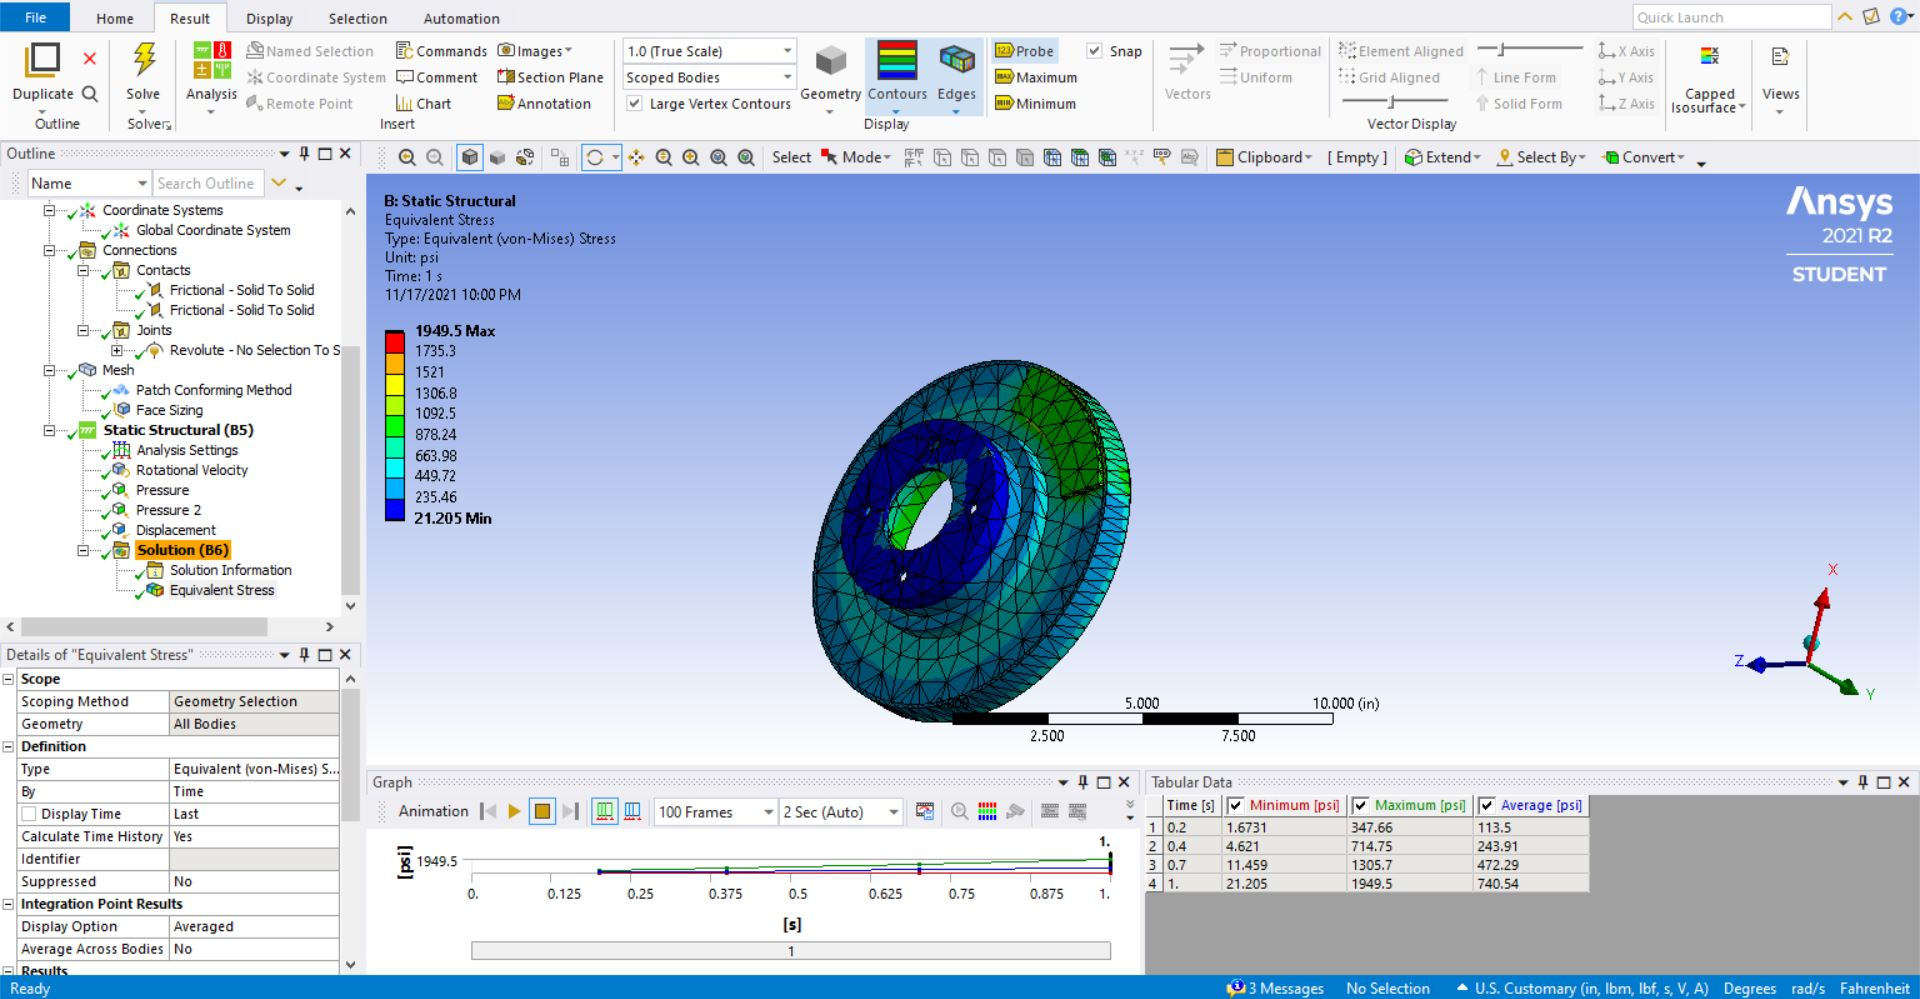

Image of Static Sructural Analysis

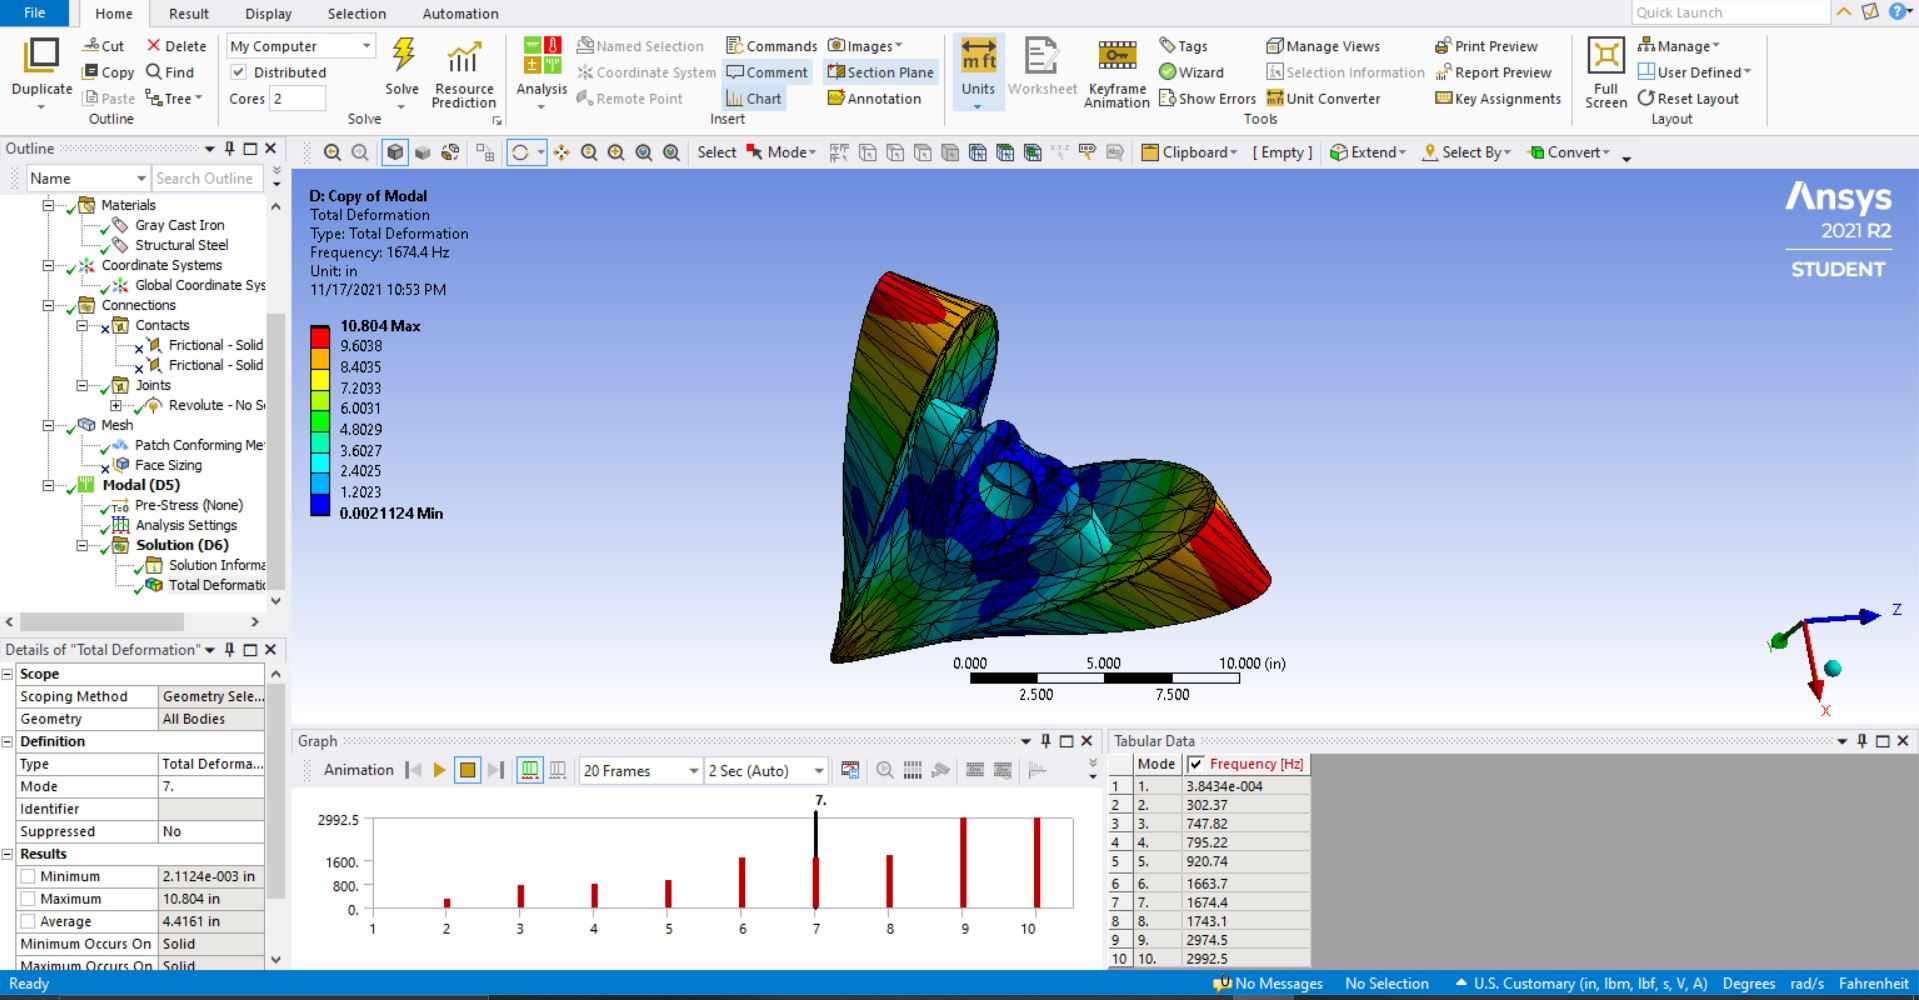

Image of Modal Analysis

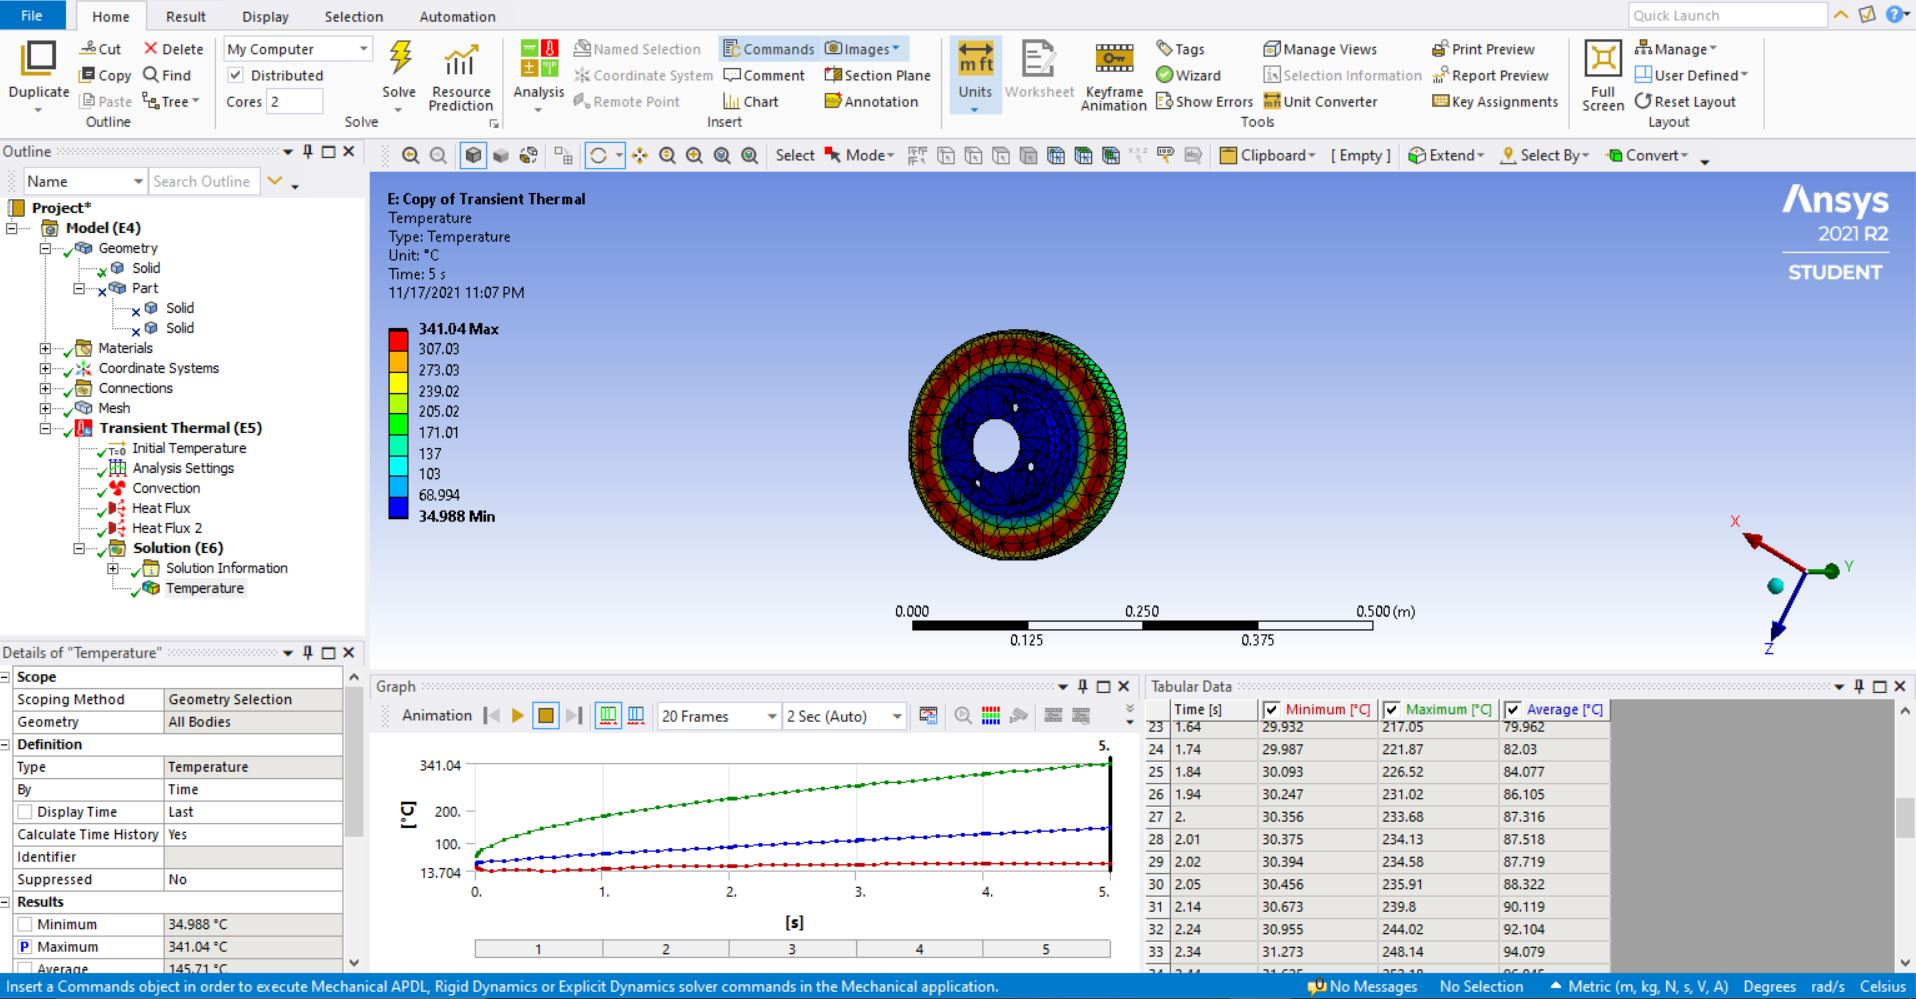

Image of Thermal Analysis

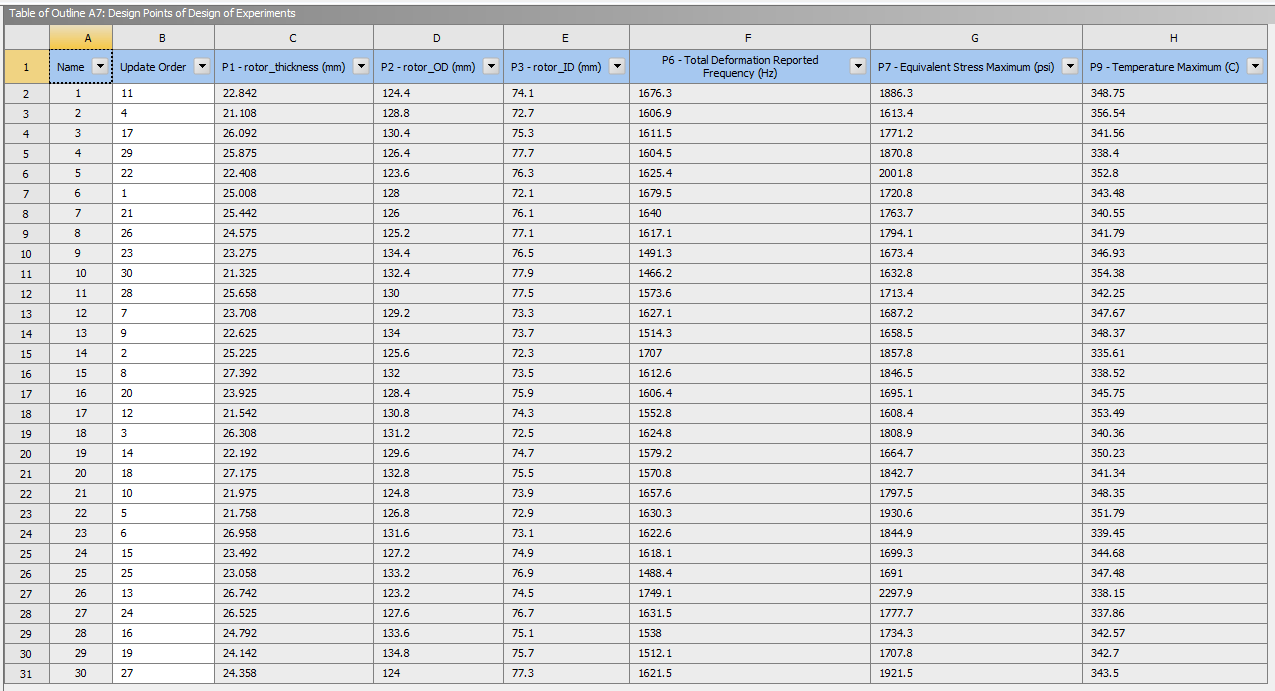

List of DOE points generated.

DOE Type: Latin Hypercube Sampling Design

Samples Type: User defined

Number of sample points: 30

The points are generated with the following varying input parameters;
Brake Disc Thikness: 21 mm to 27.5 mm
Brake Disc Outer Dia: 123 mm to 135 mm
Brake Disc Inner Dia: 72 mm to 78 mm

**Response**
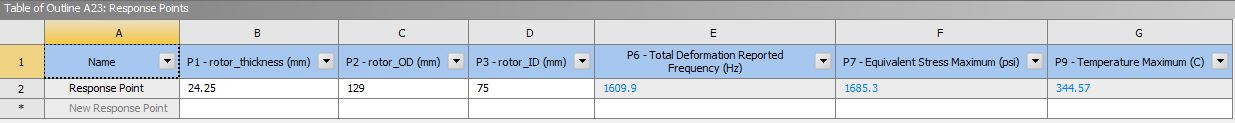

**Response Curves**

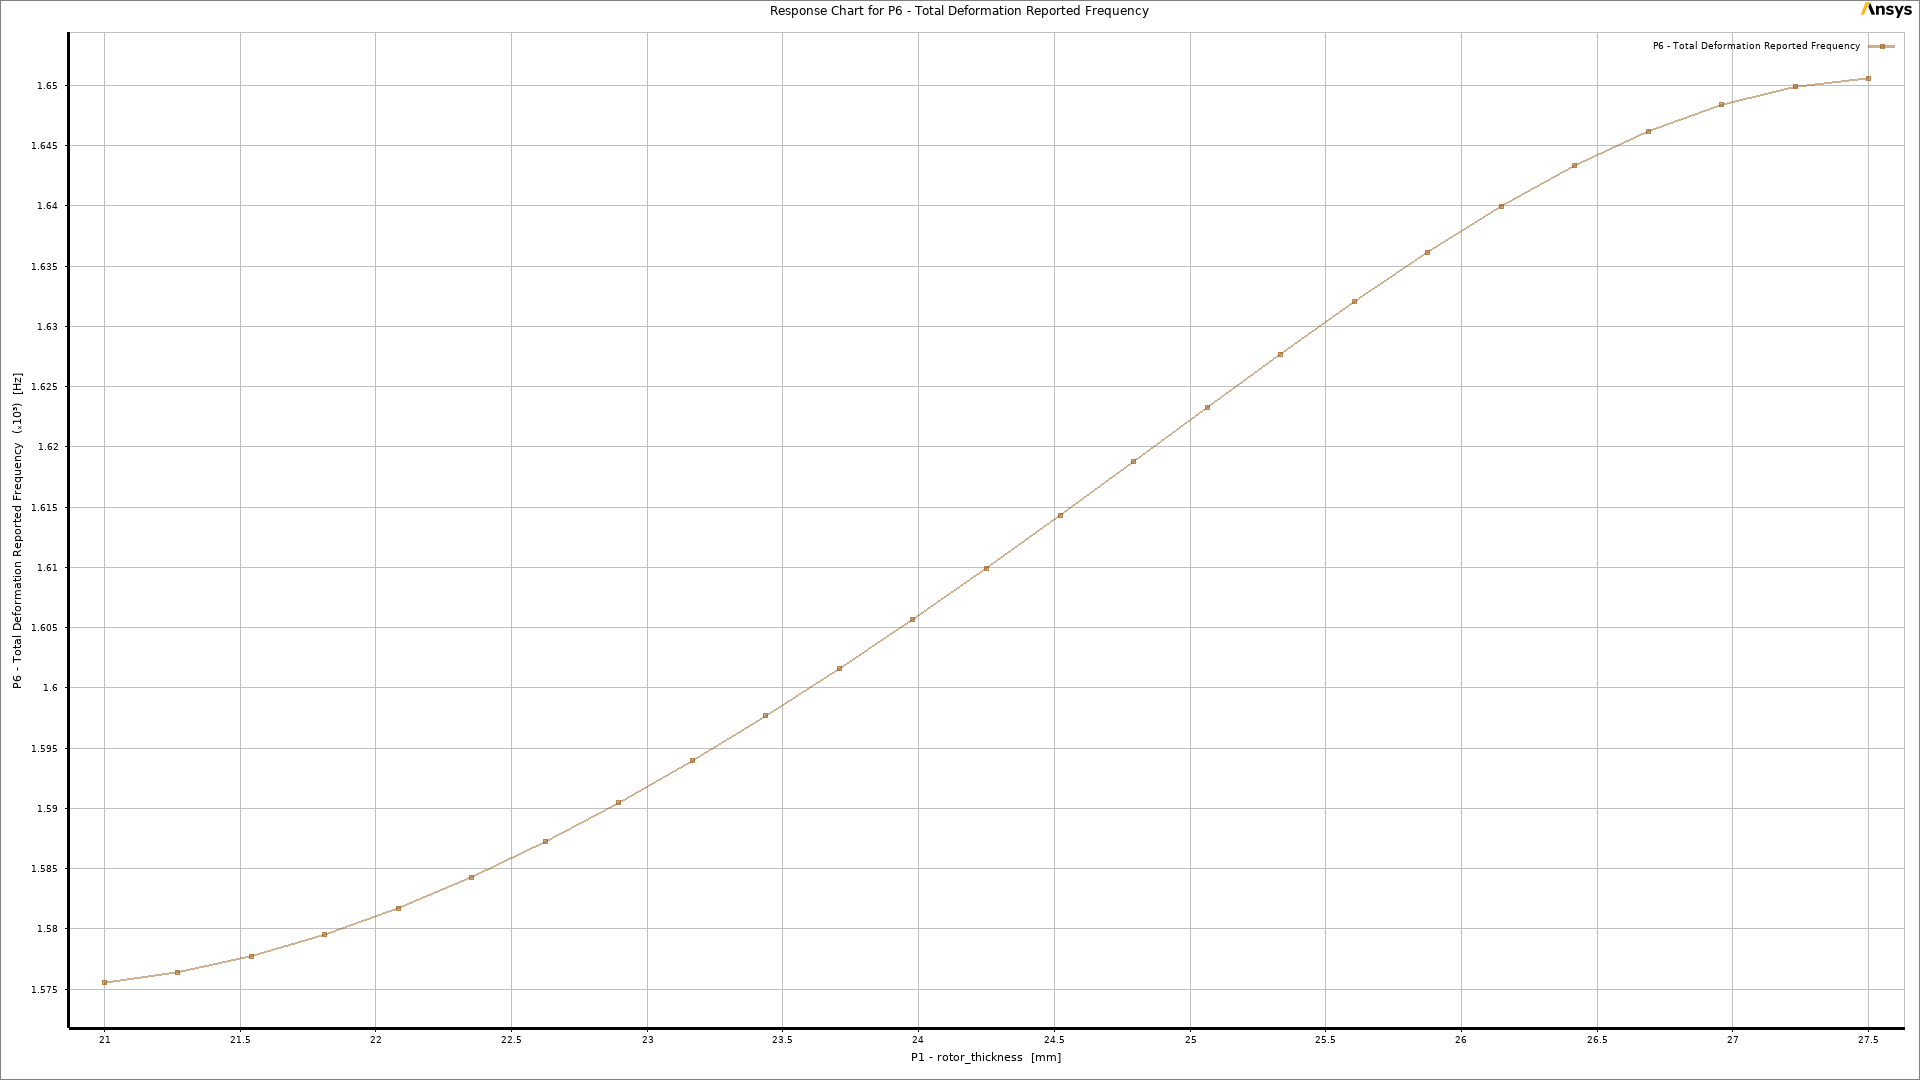
Equivalent Maximum Stress vs Rotor Thickness



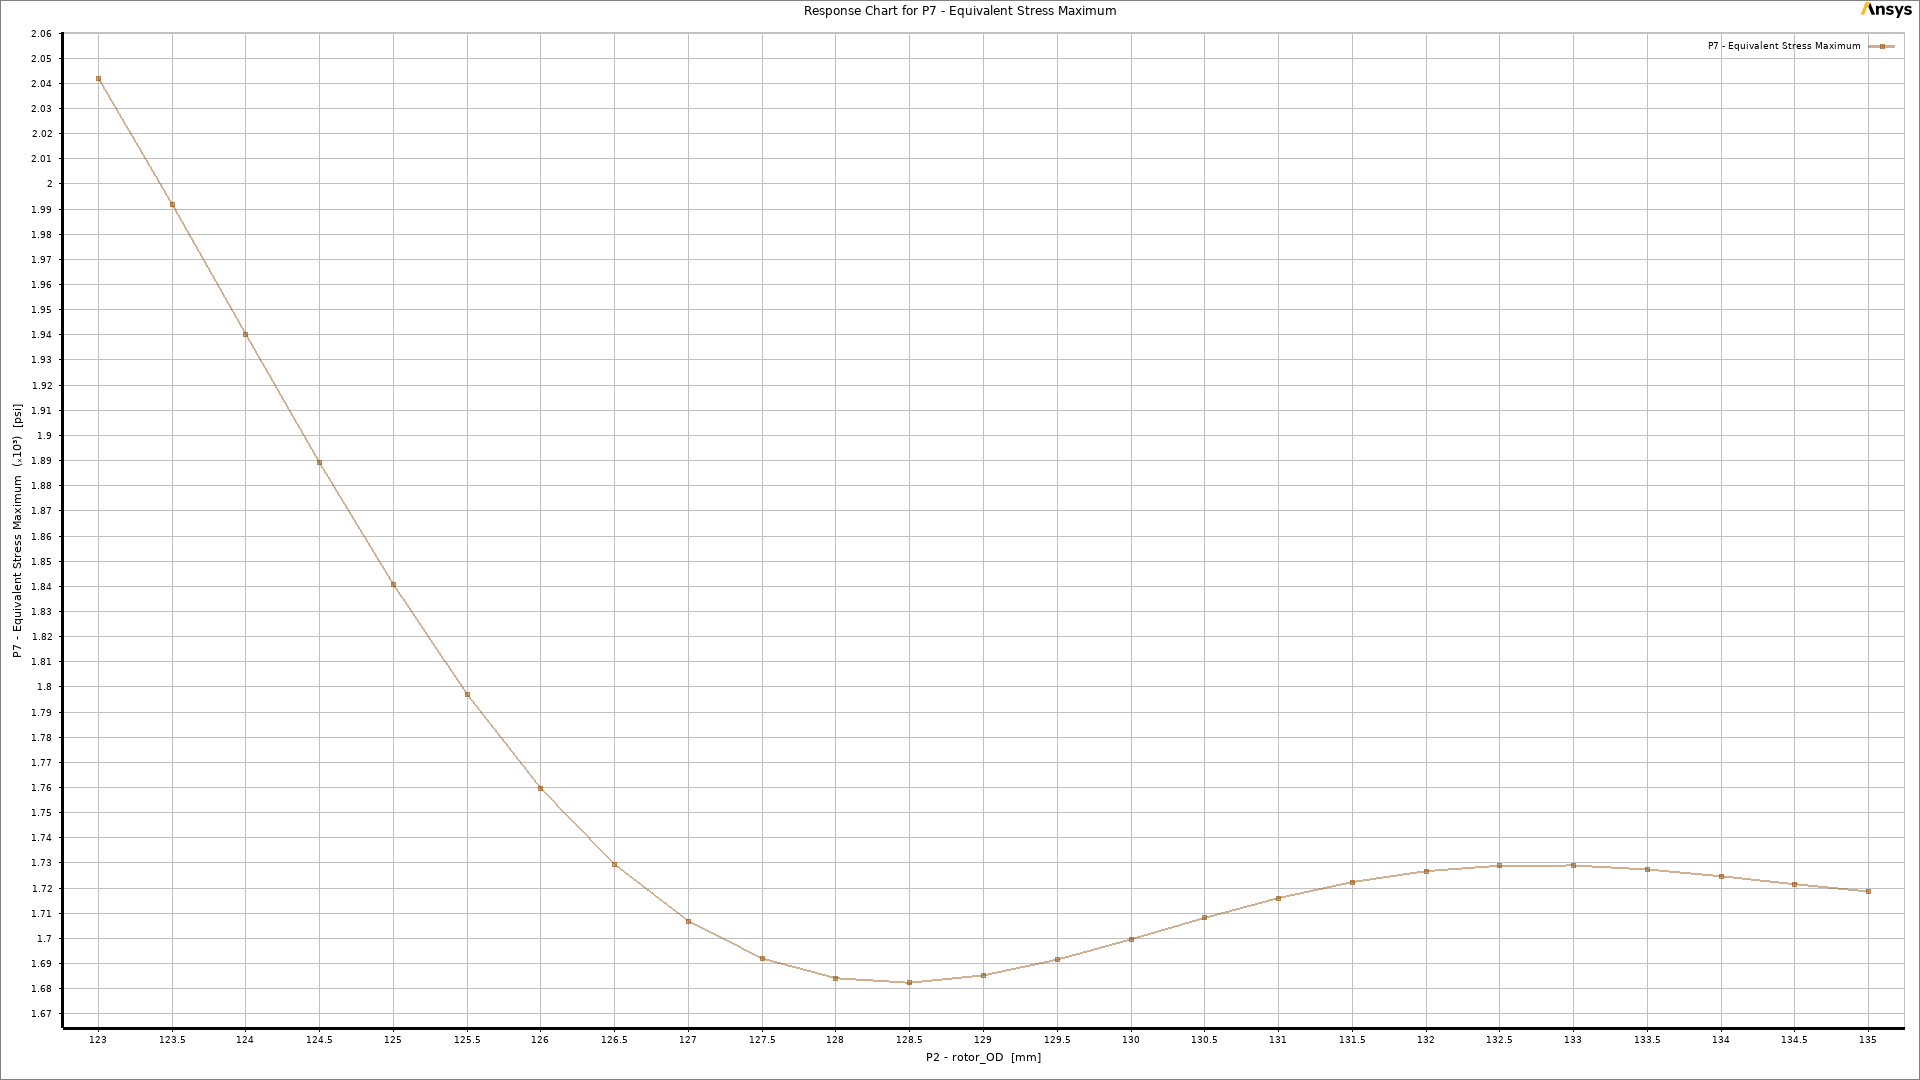

Equivalent Maximum stress vs Rotor Outer Diameter

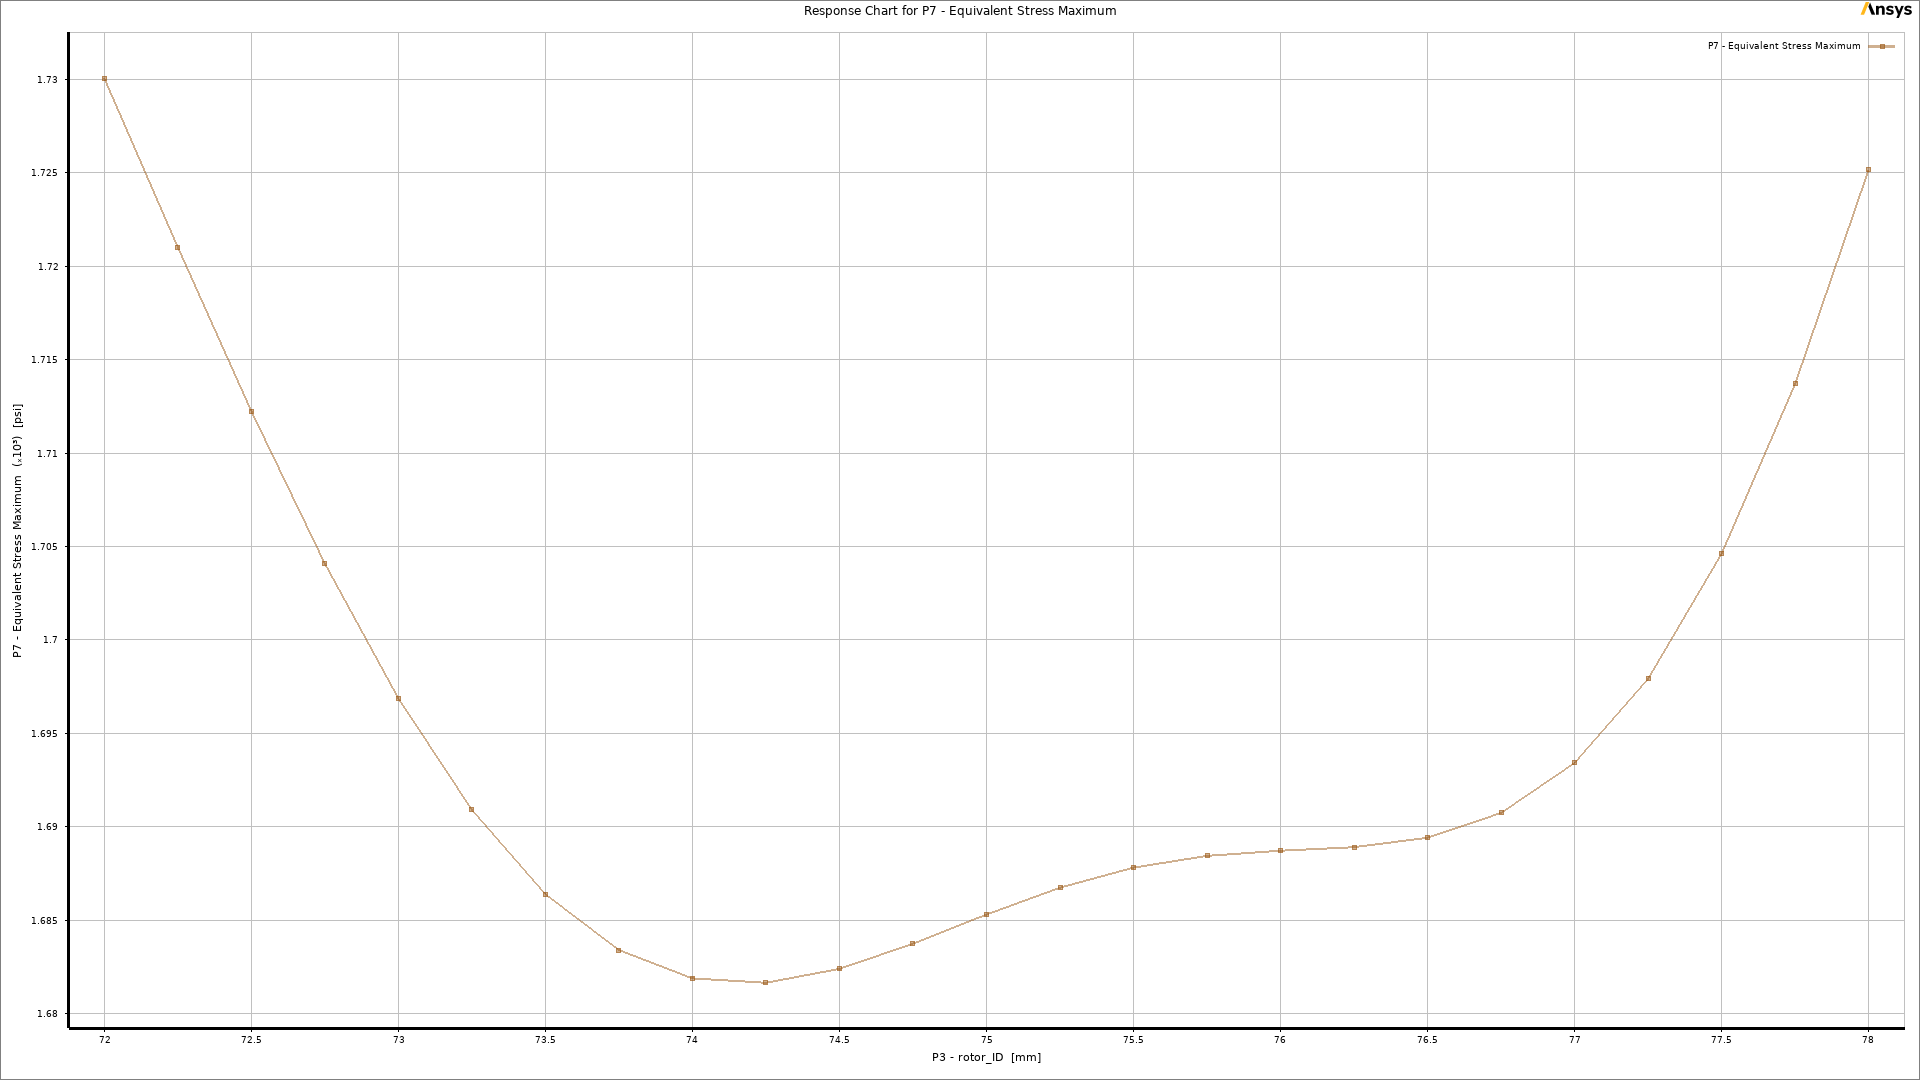
Eqivalent Maximum Stress vs Inner Diameter

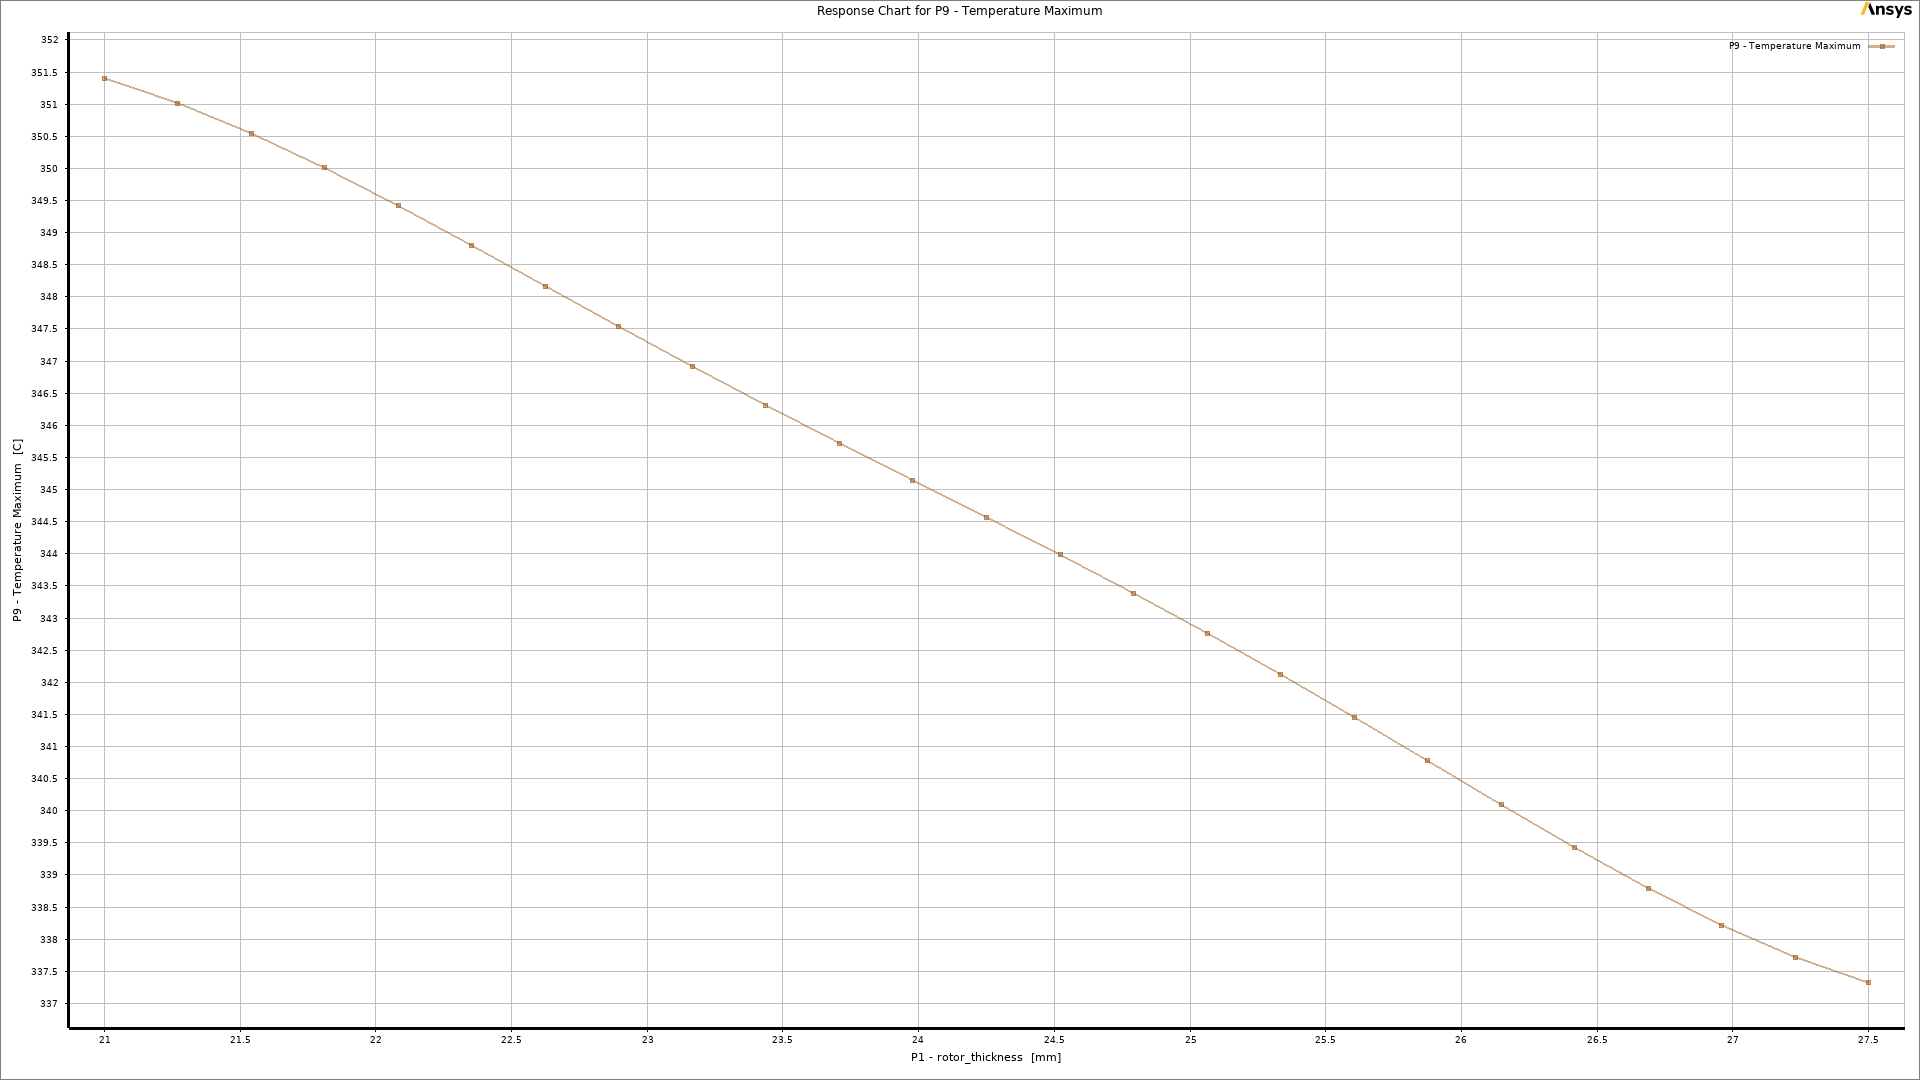
Maximum Temperature vs Rotor Thickness

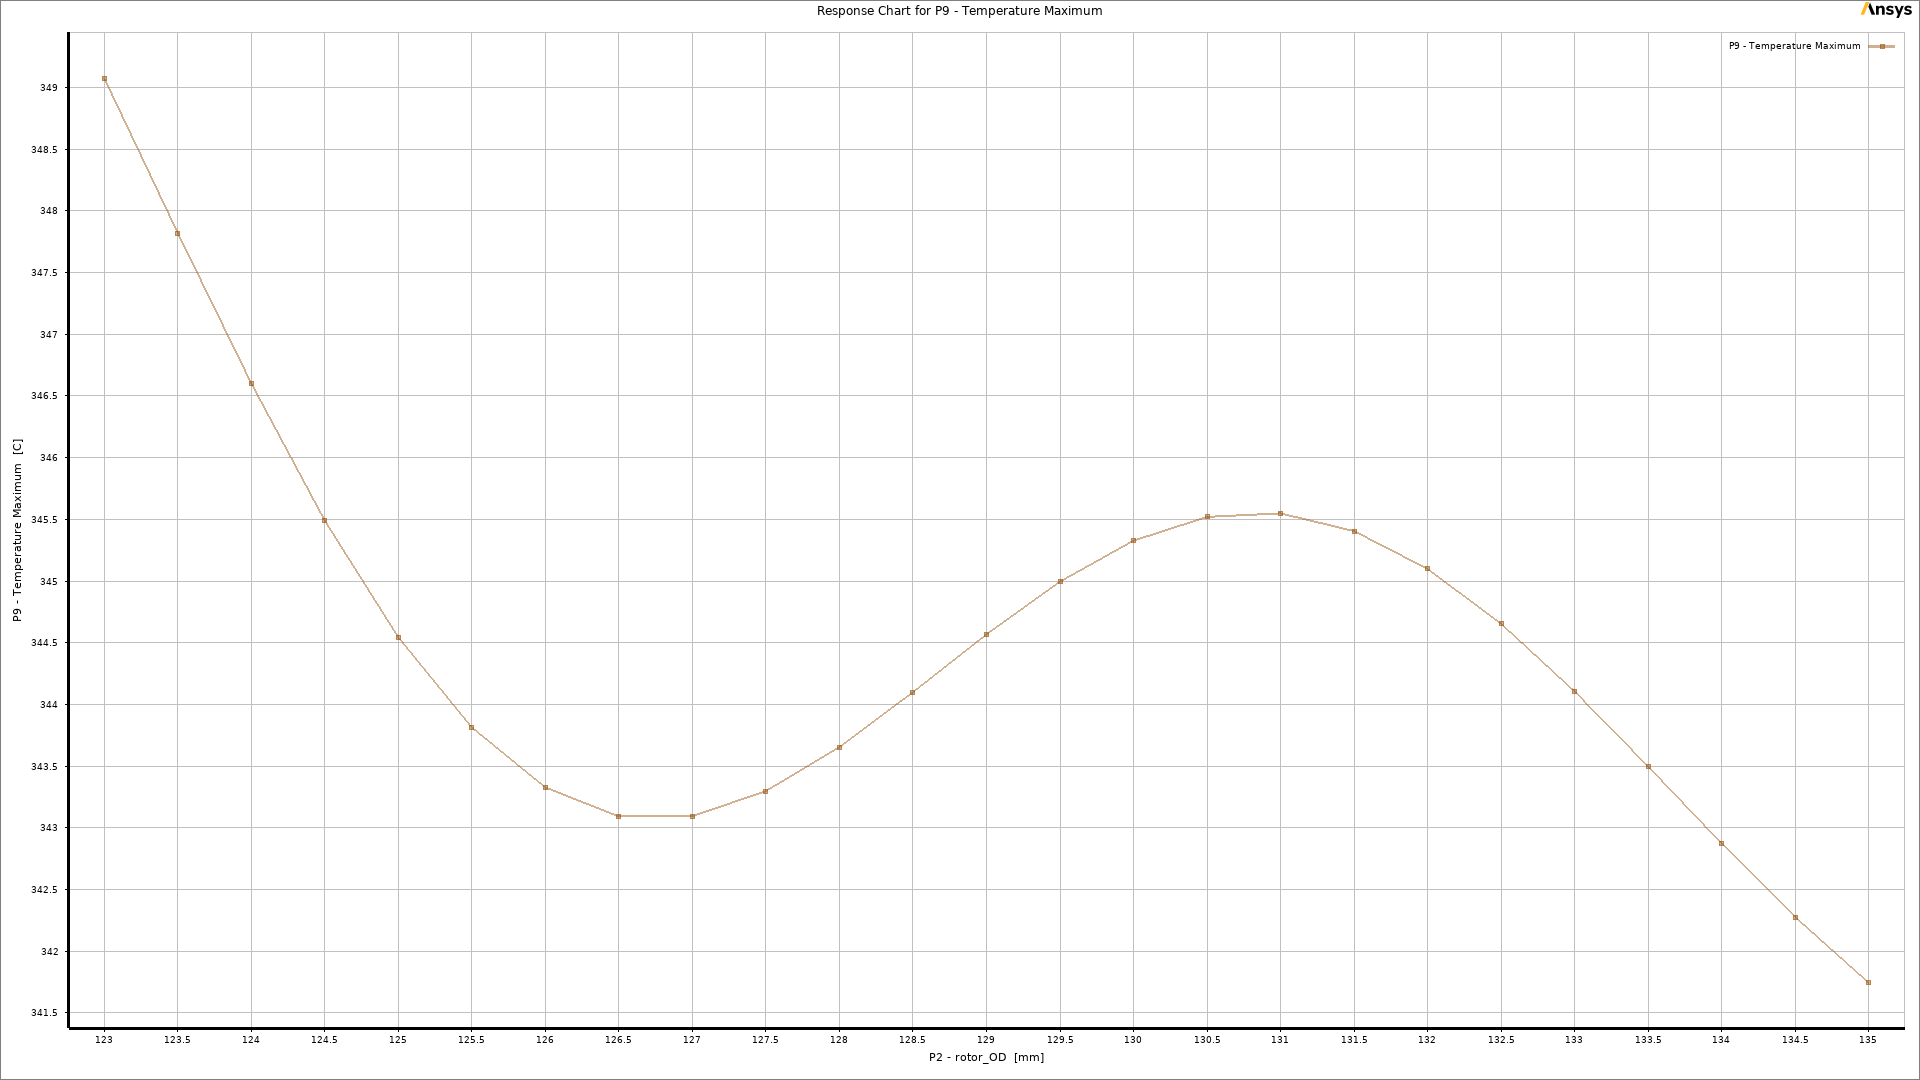
Maximum Temperature vs Rotor Outer Diameter

**Local Sensitivity Variation**
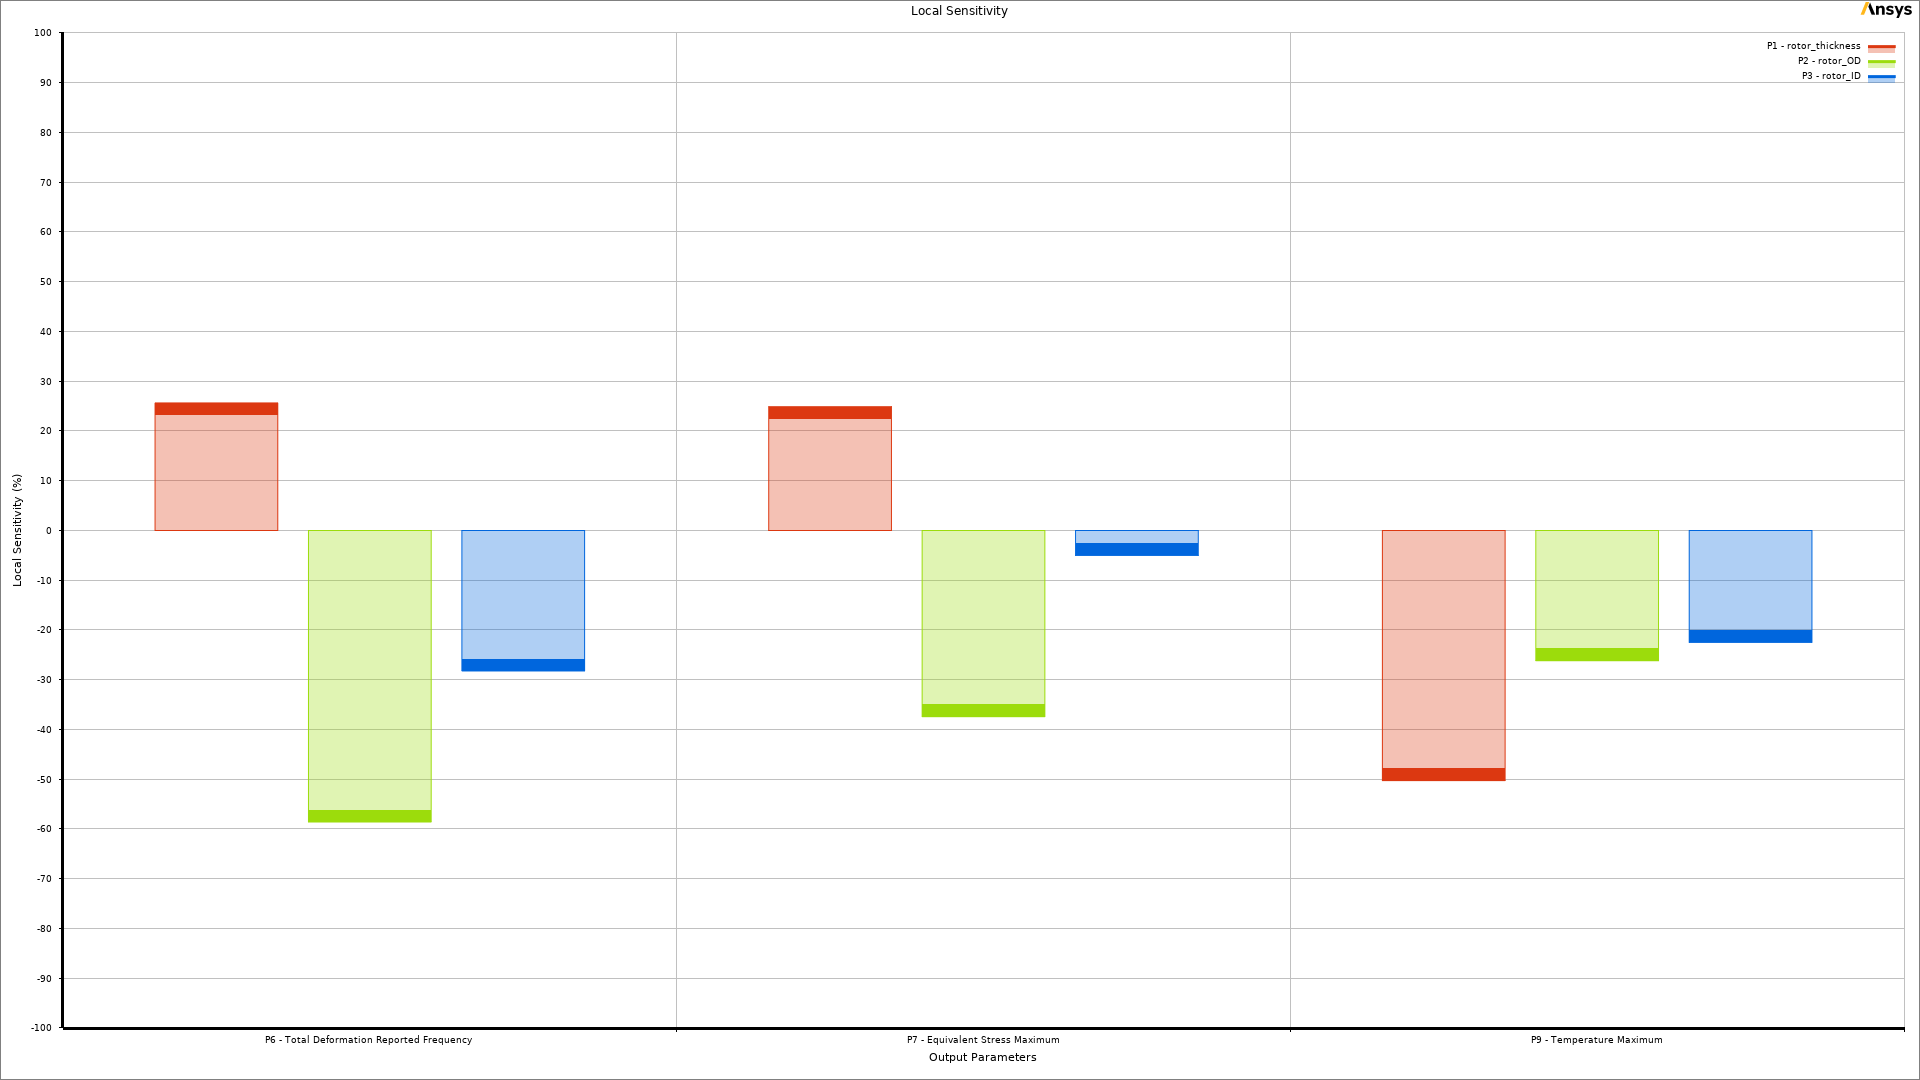

**Local Sensitivity Curves**

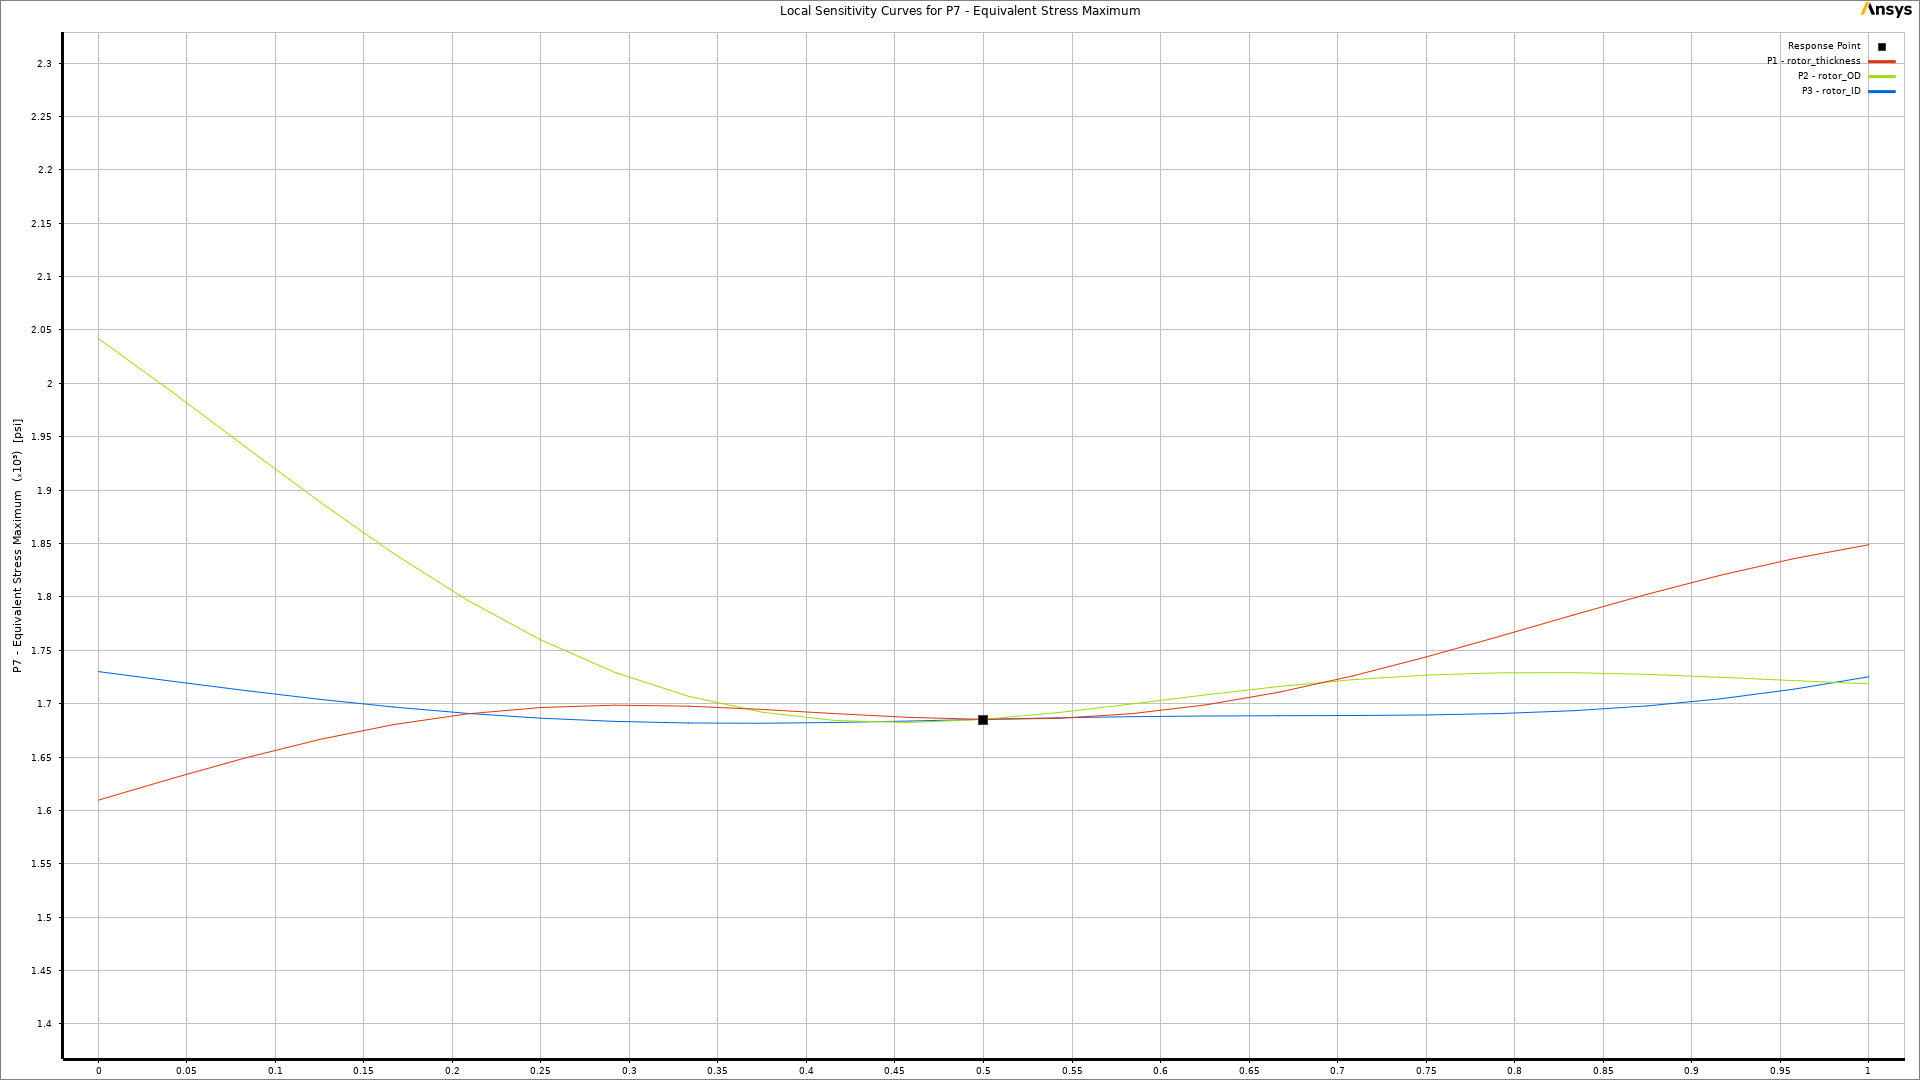
Maximum Stress vs Input Paramters

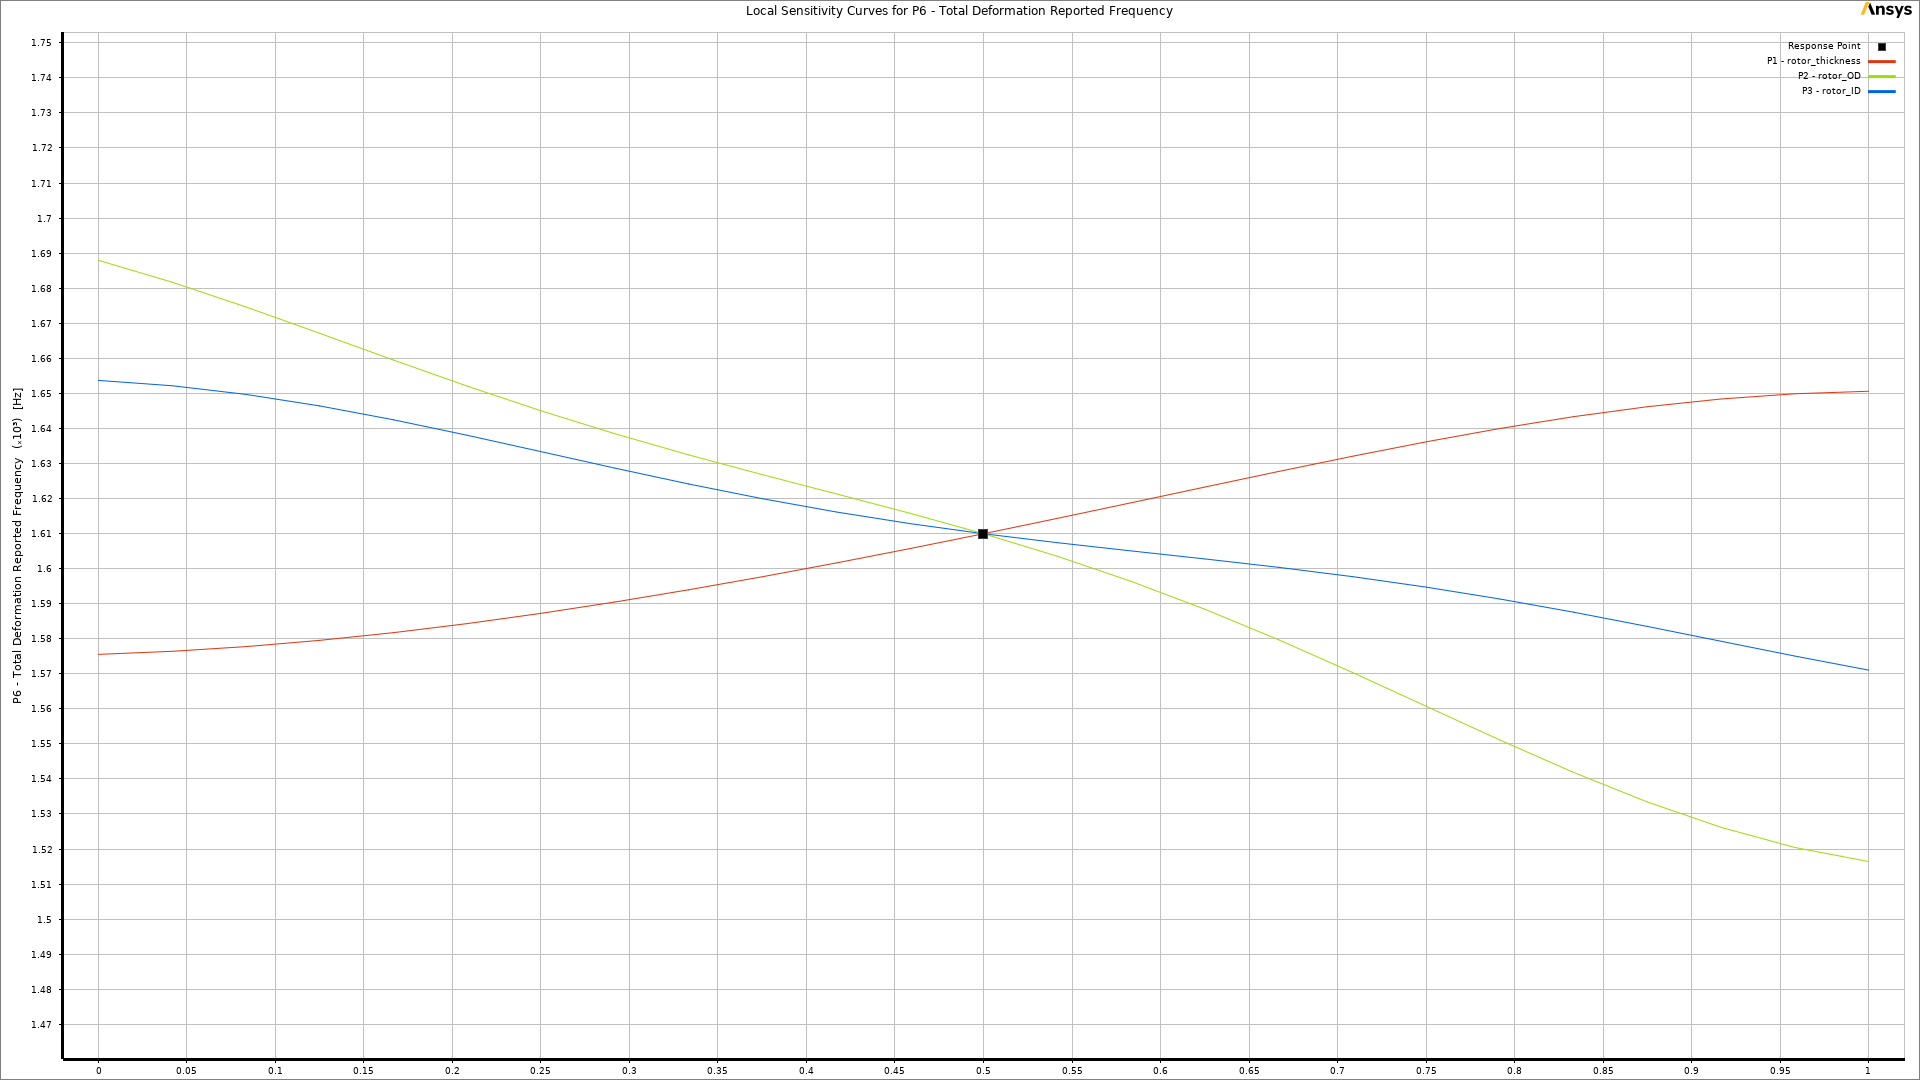
Total Deformation vs Input Paramters

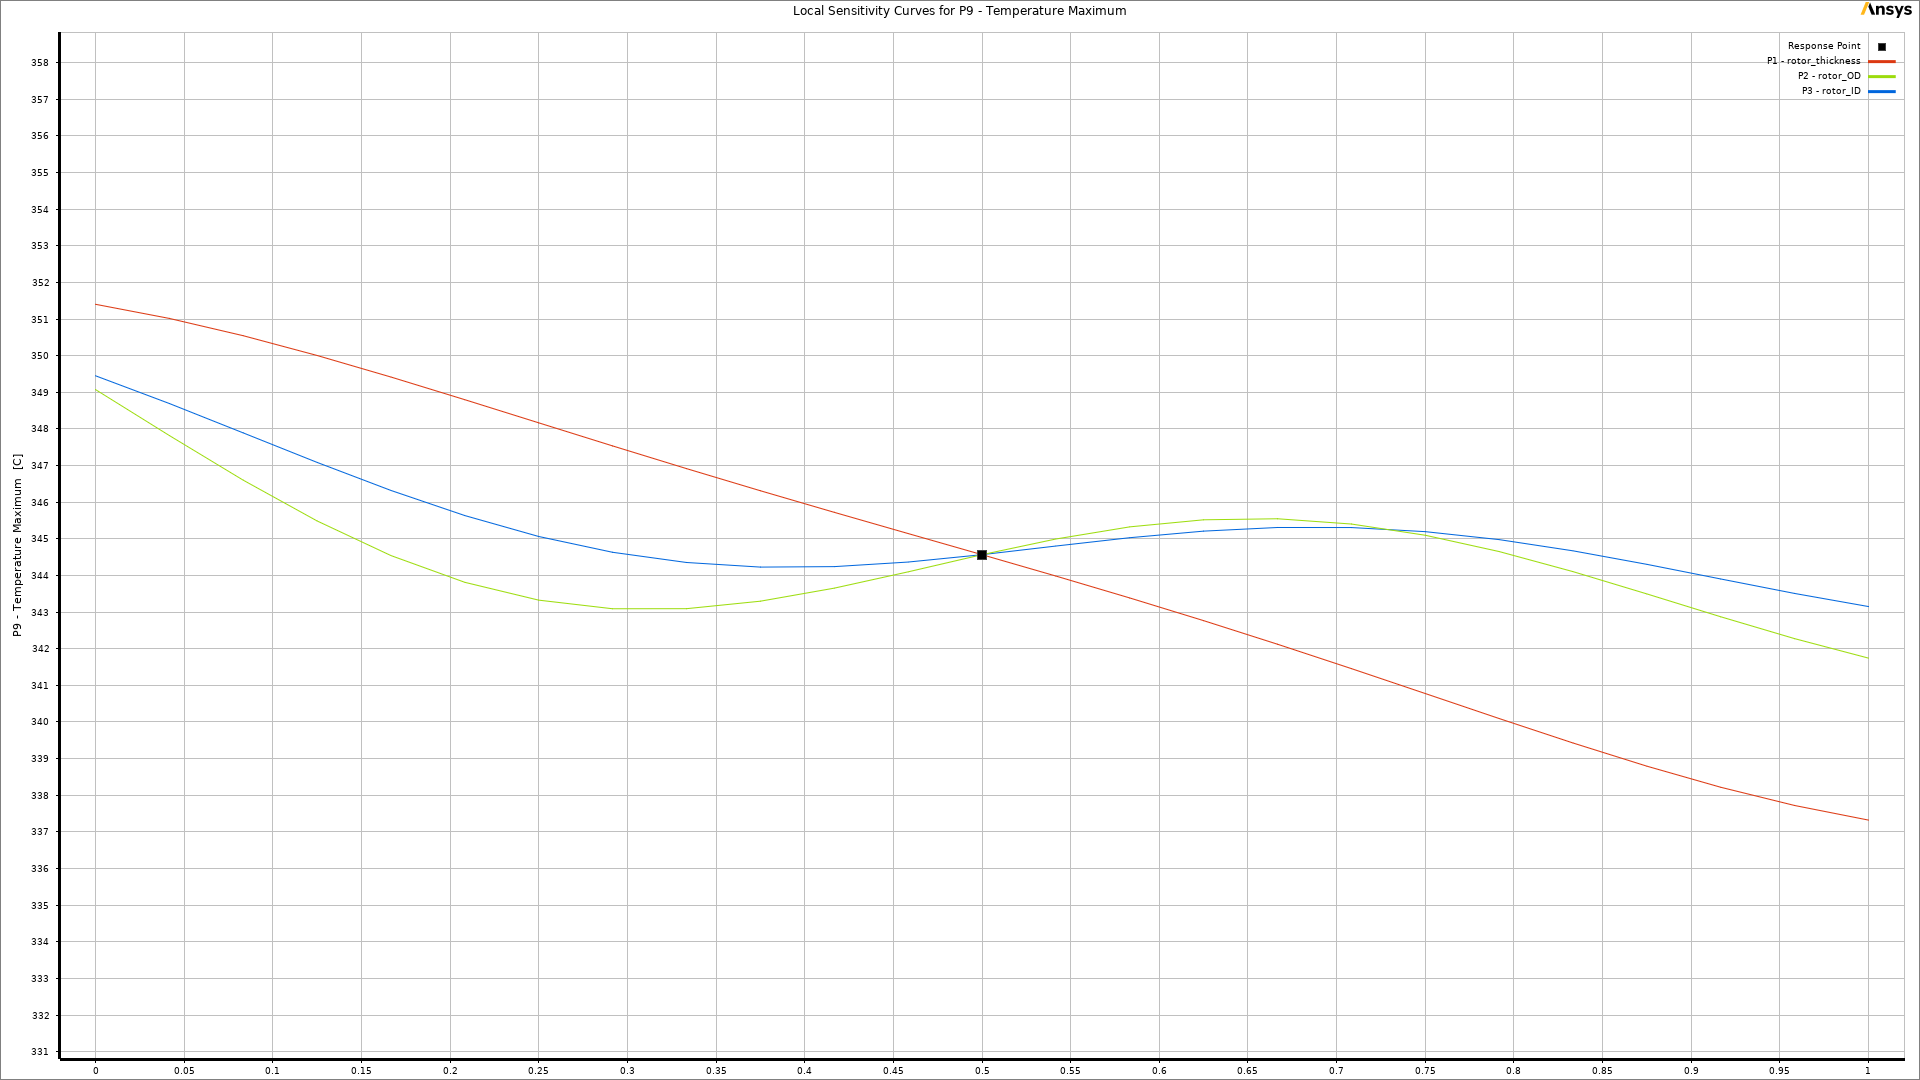
Maximum Temperature vs Input Parameters

**Spider Chart of Input Paramters**
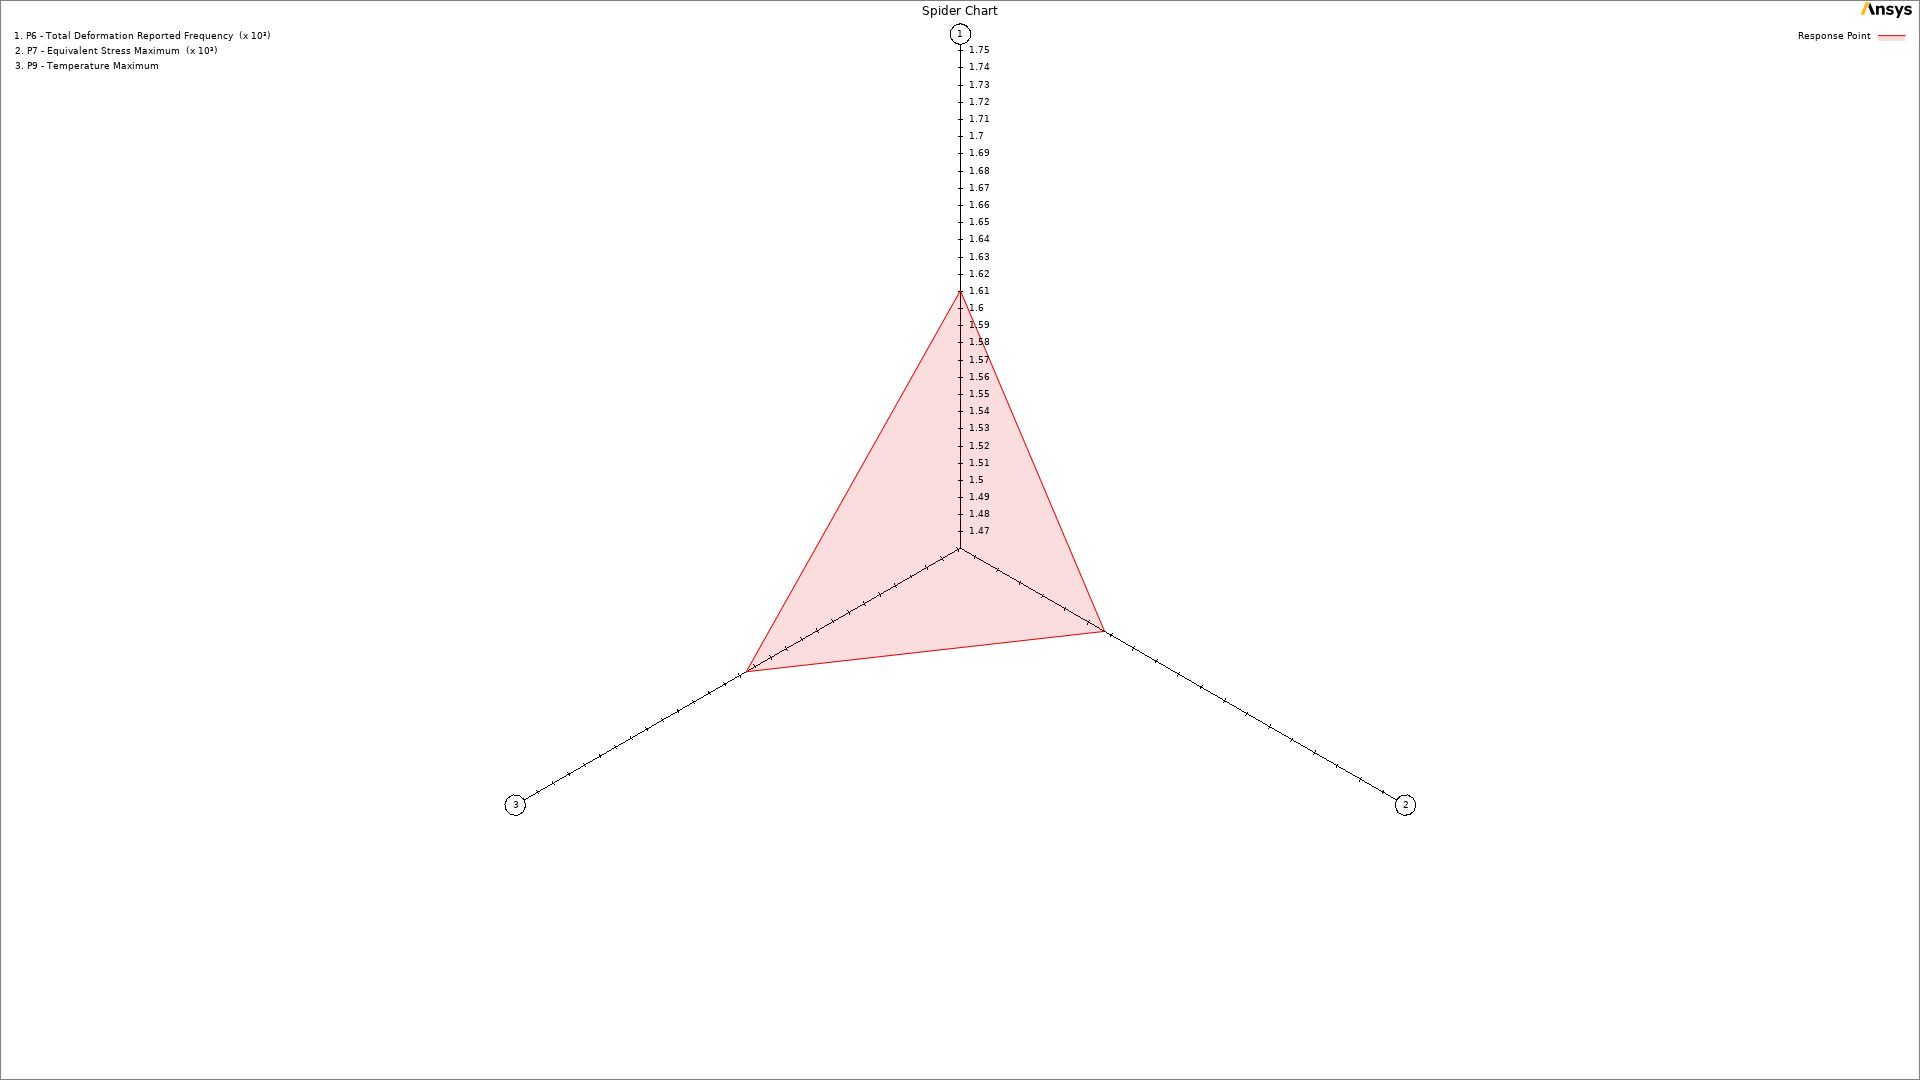

**Optimization**
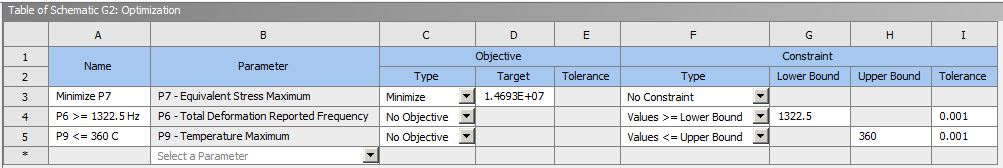
Optimization criteria used; points determined from response surface.
Here Multiobjective Genetic Algorithm (MOGA) has been used as we had multiple contraints to check/ multiple objectives.

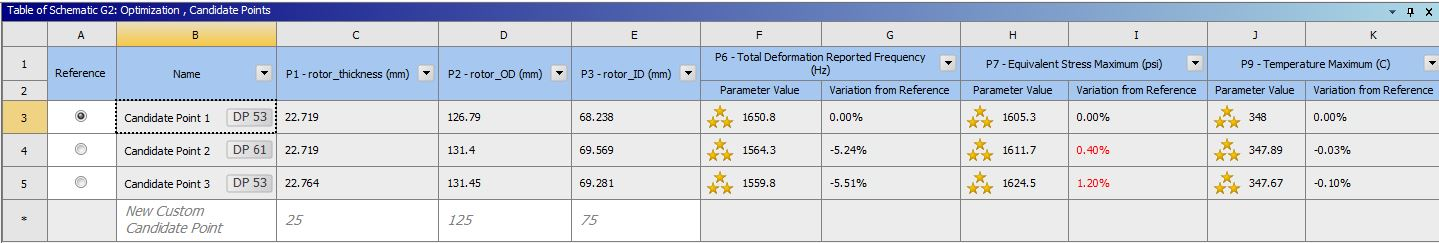
Candidate points.

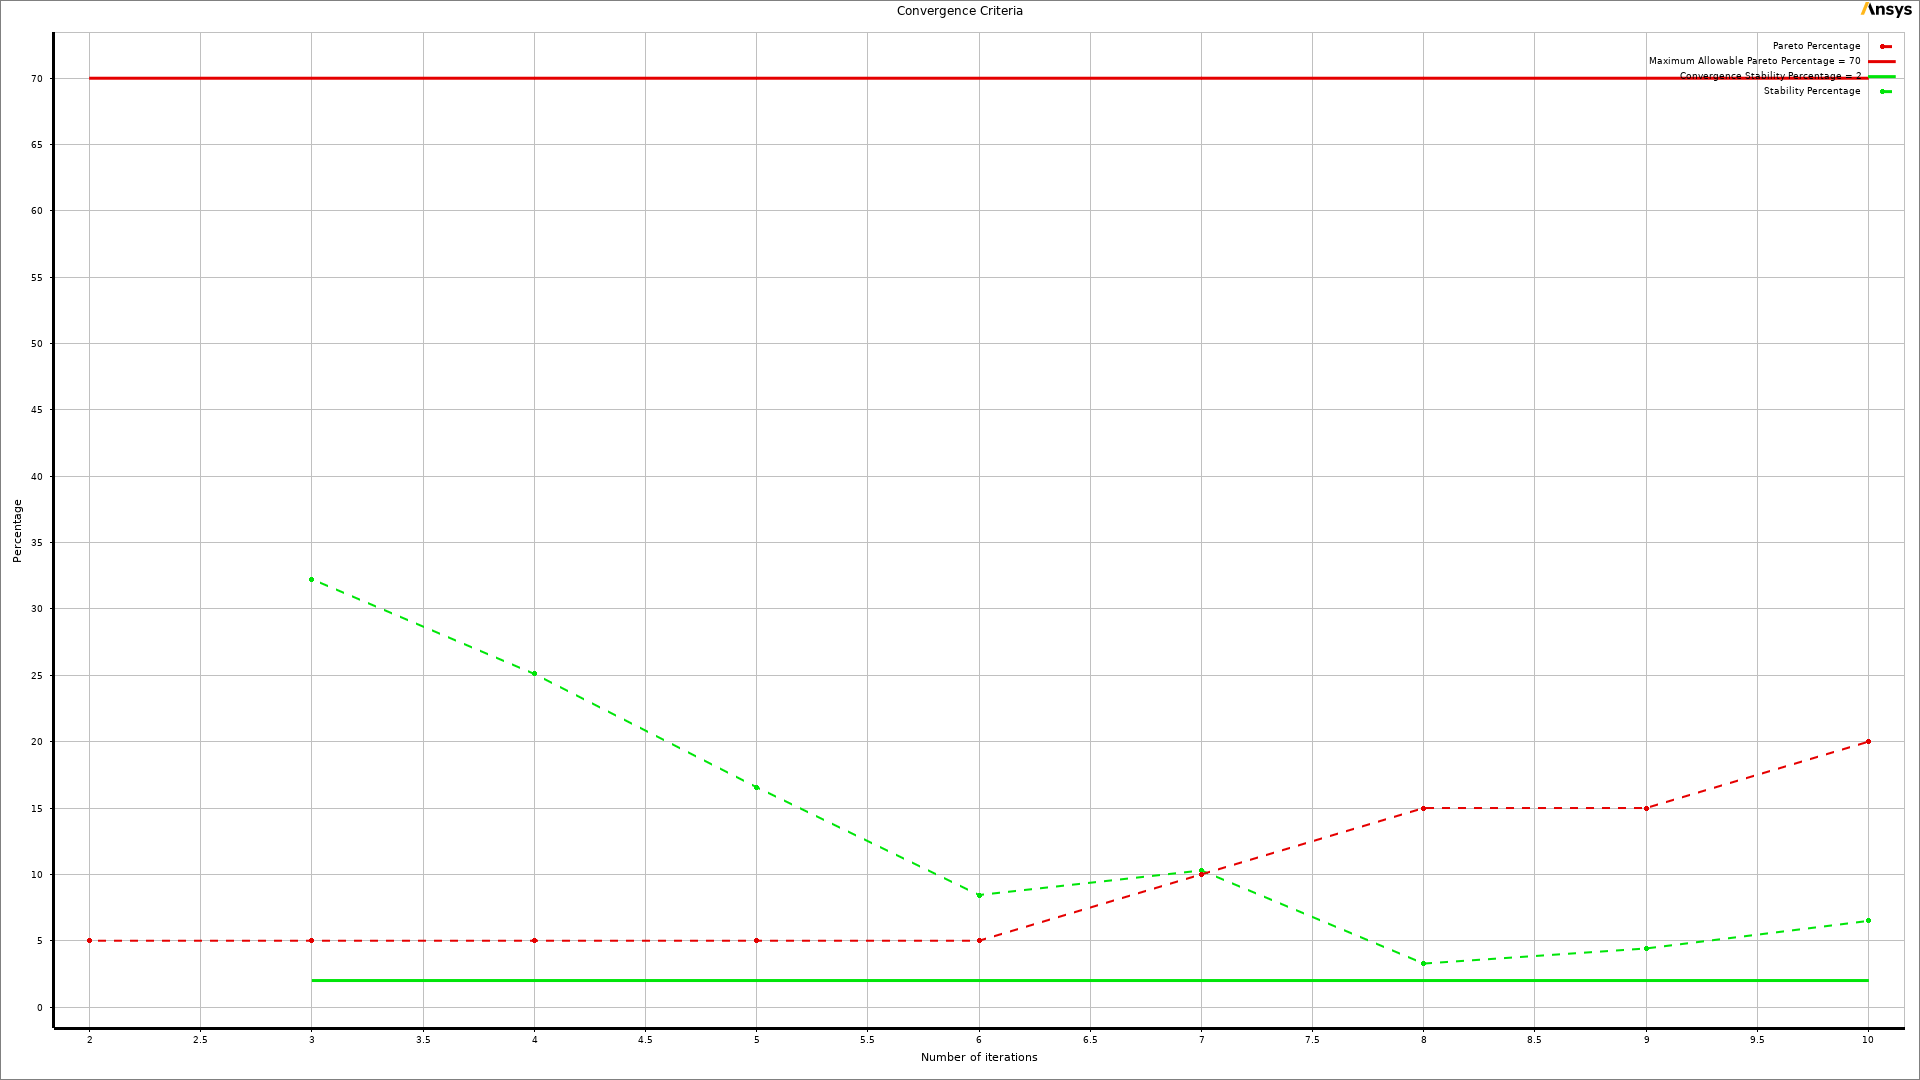
Convergence Criteria

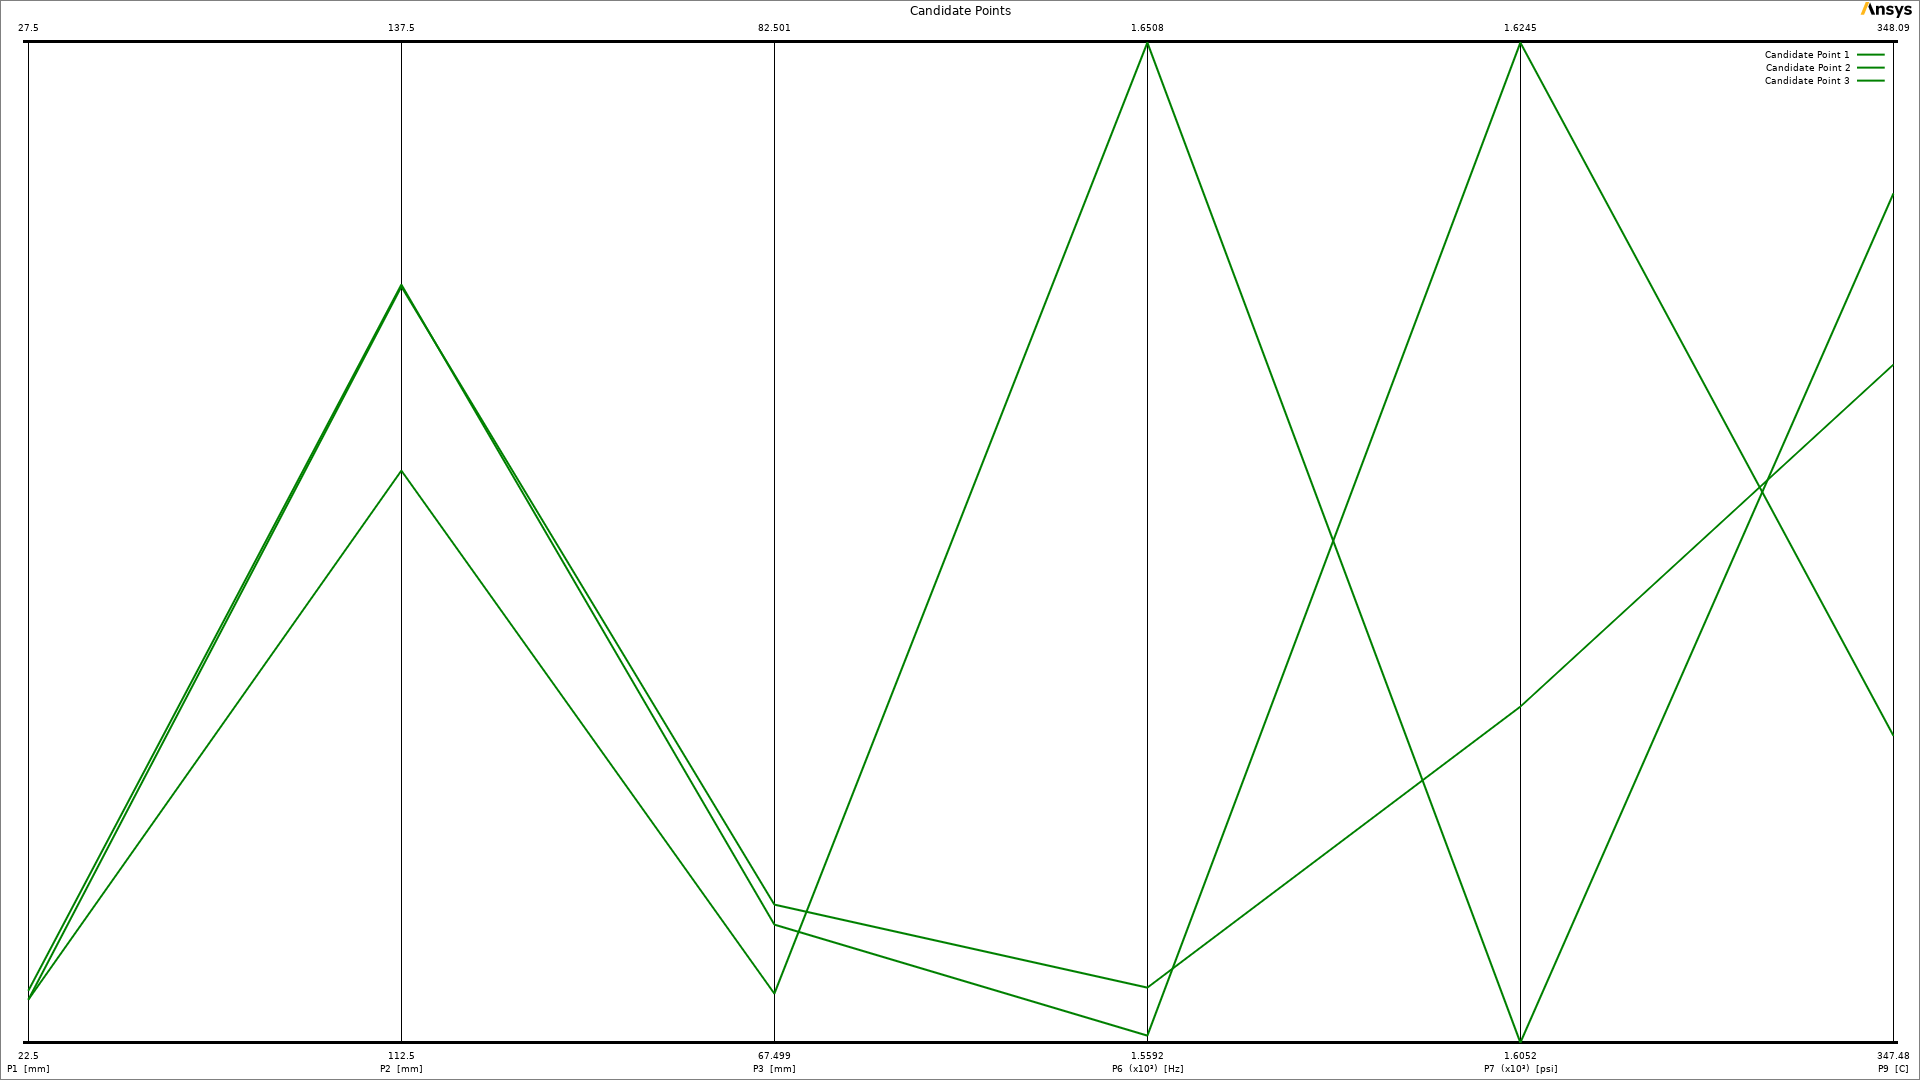
Candidate Points

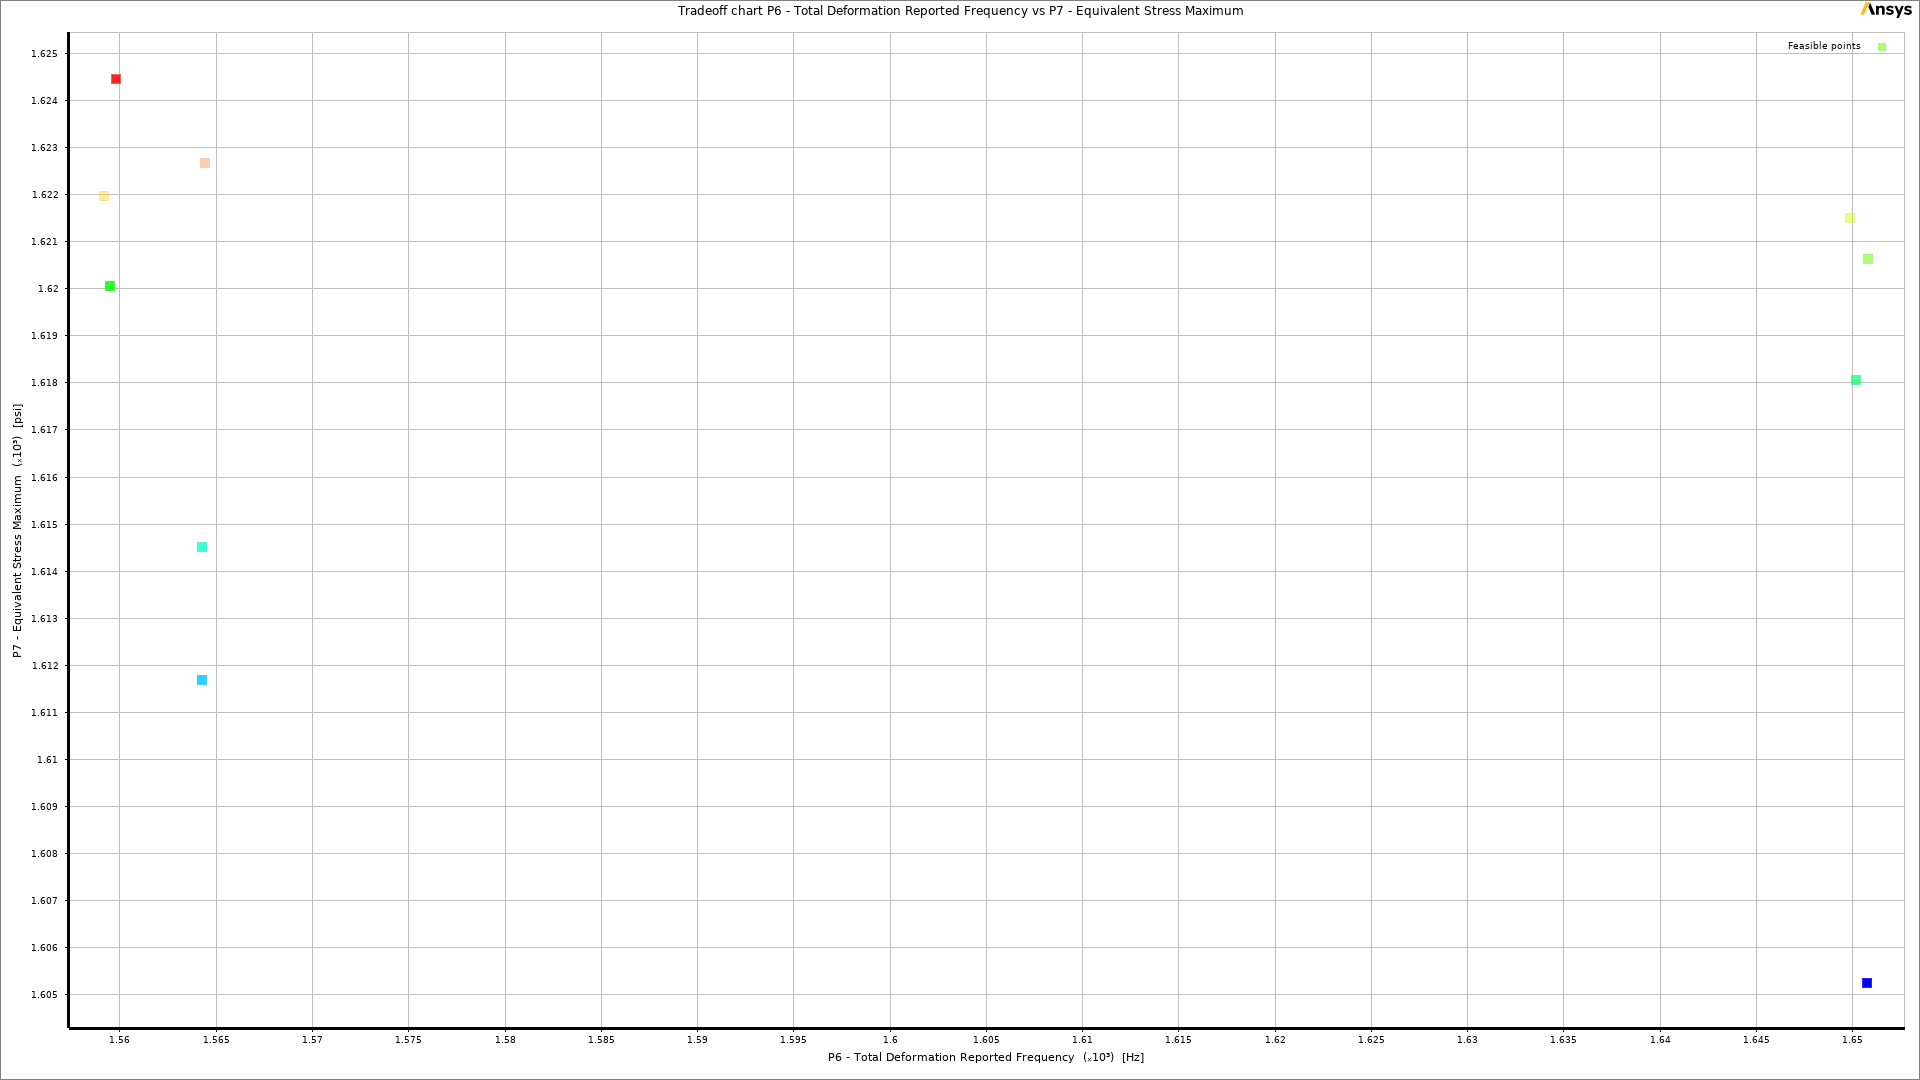
Trade-off chart 2D

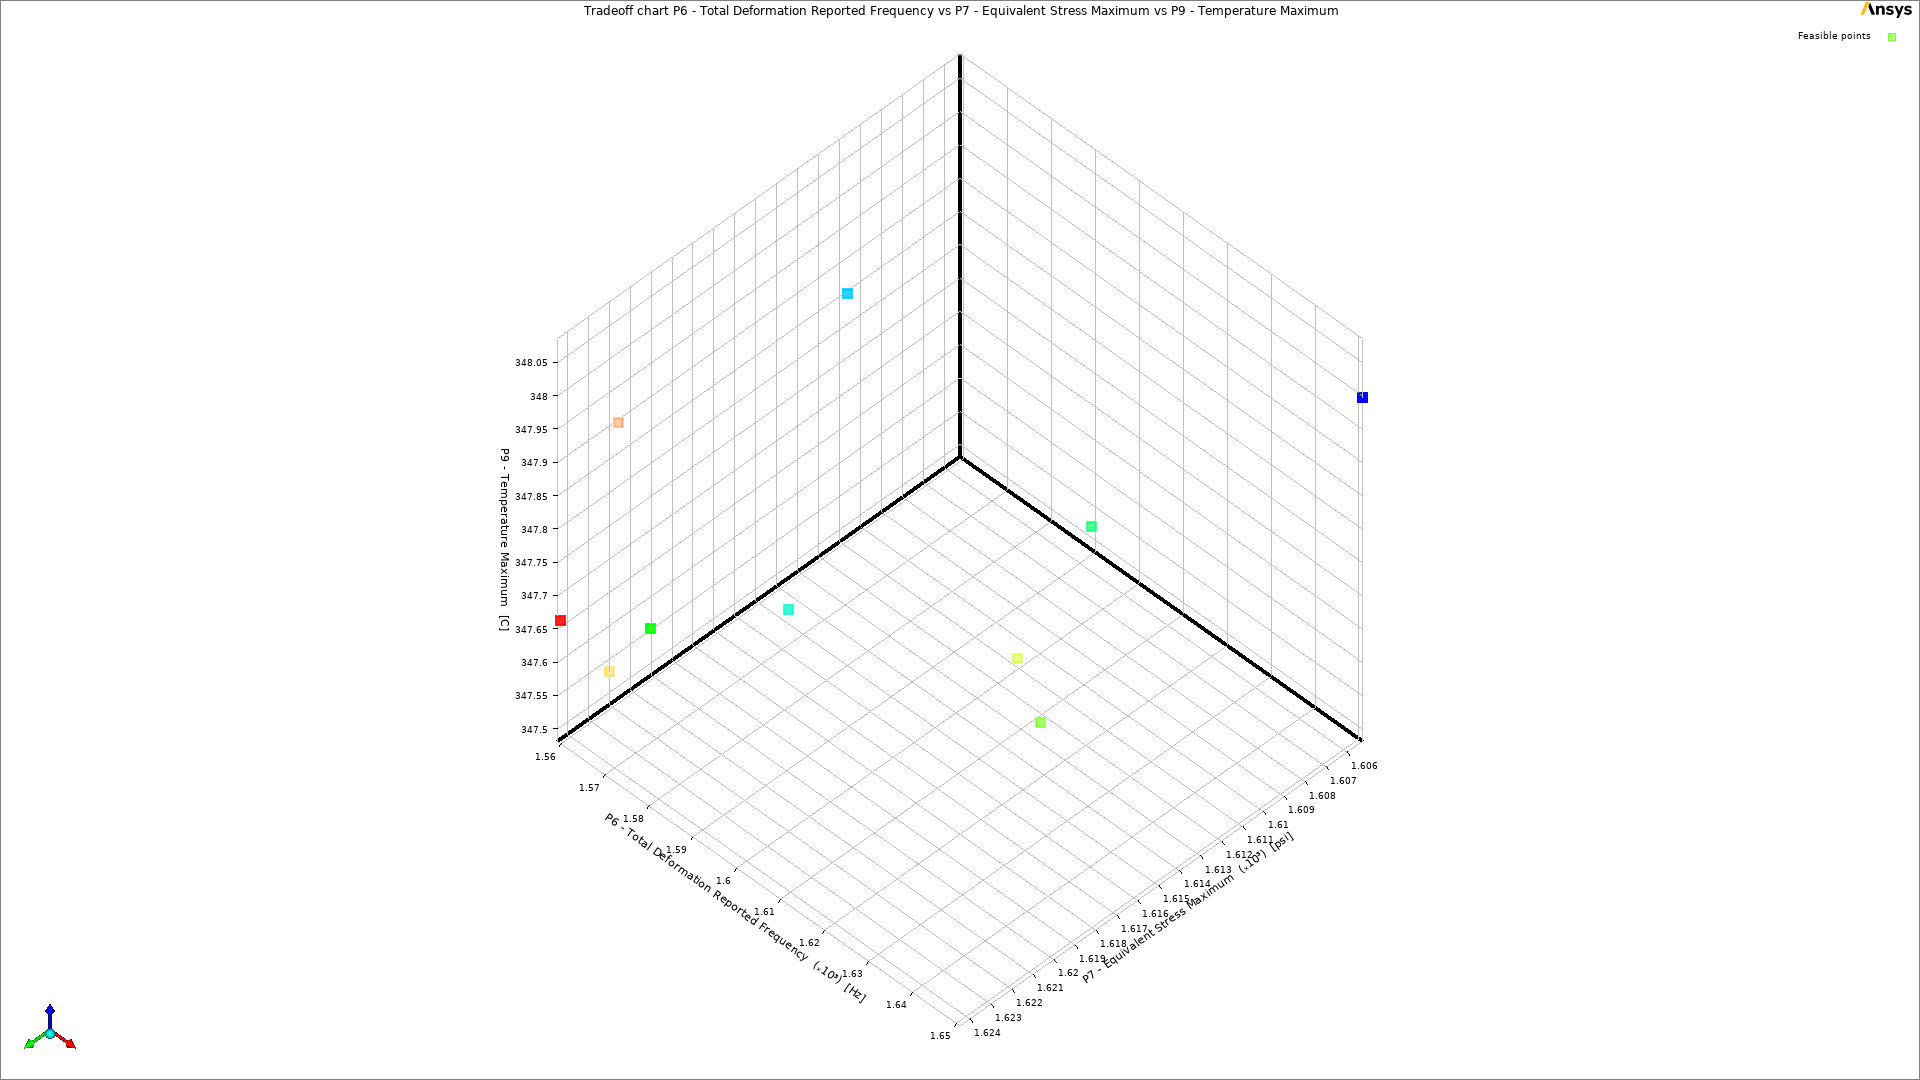
Trade-Off Chart 3D

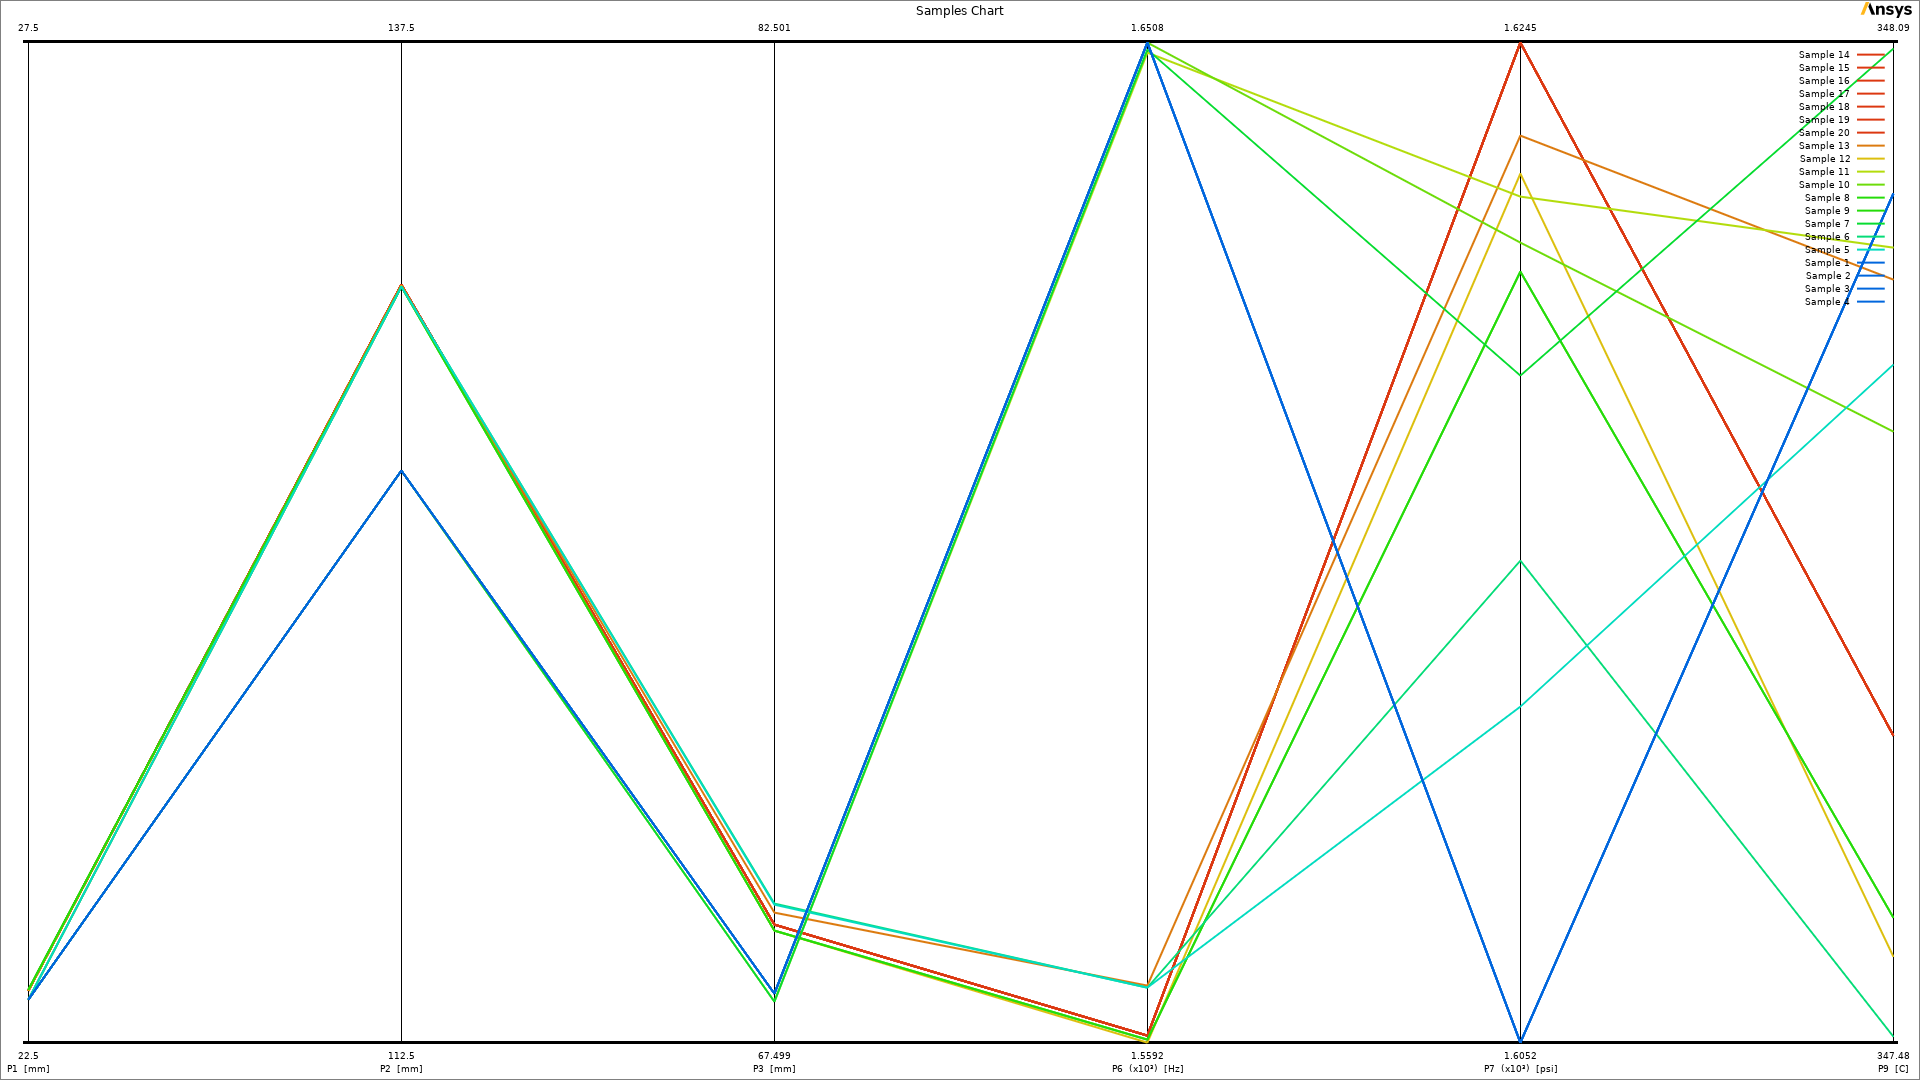
Sample Chart

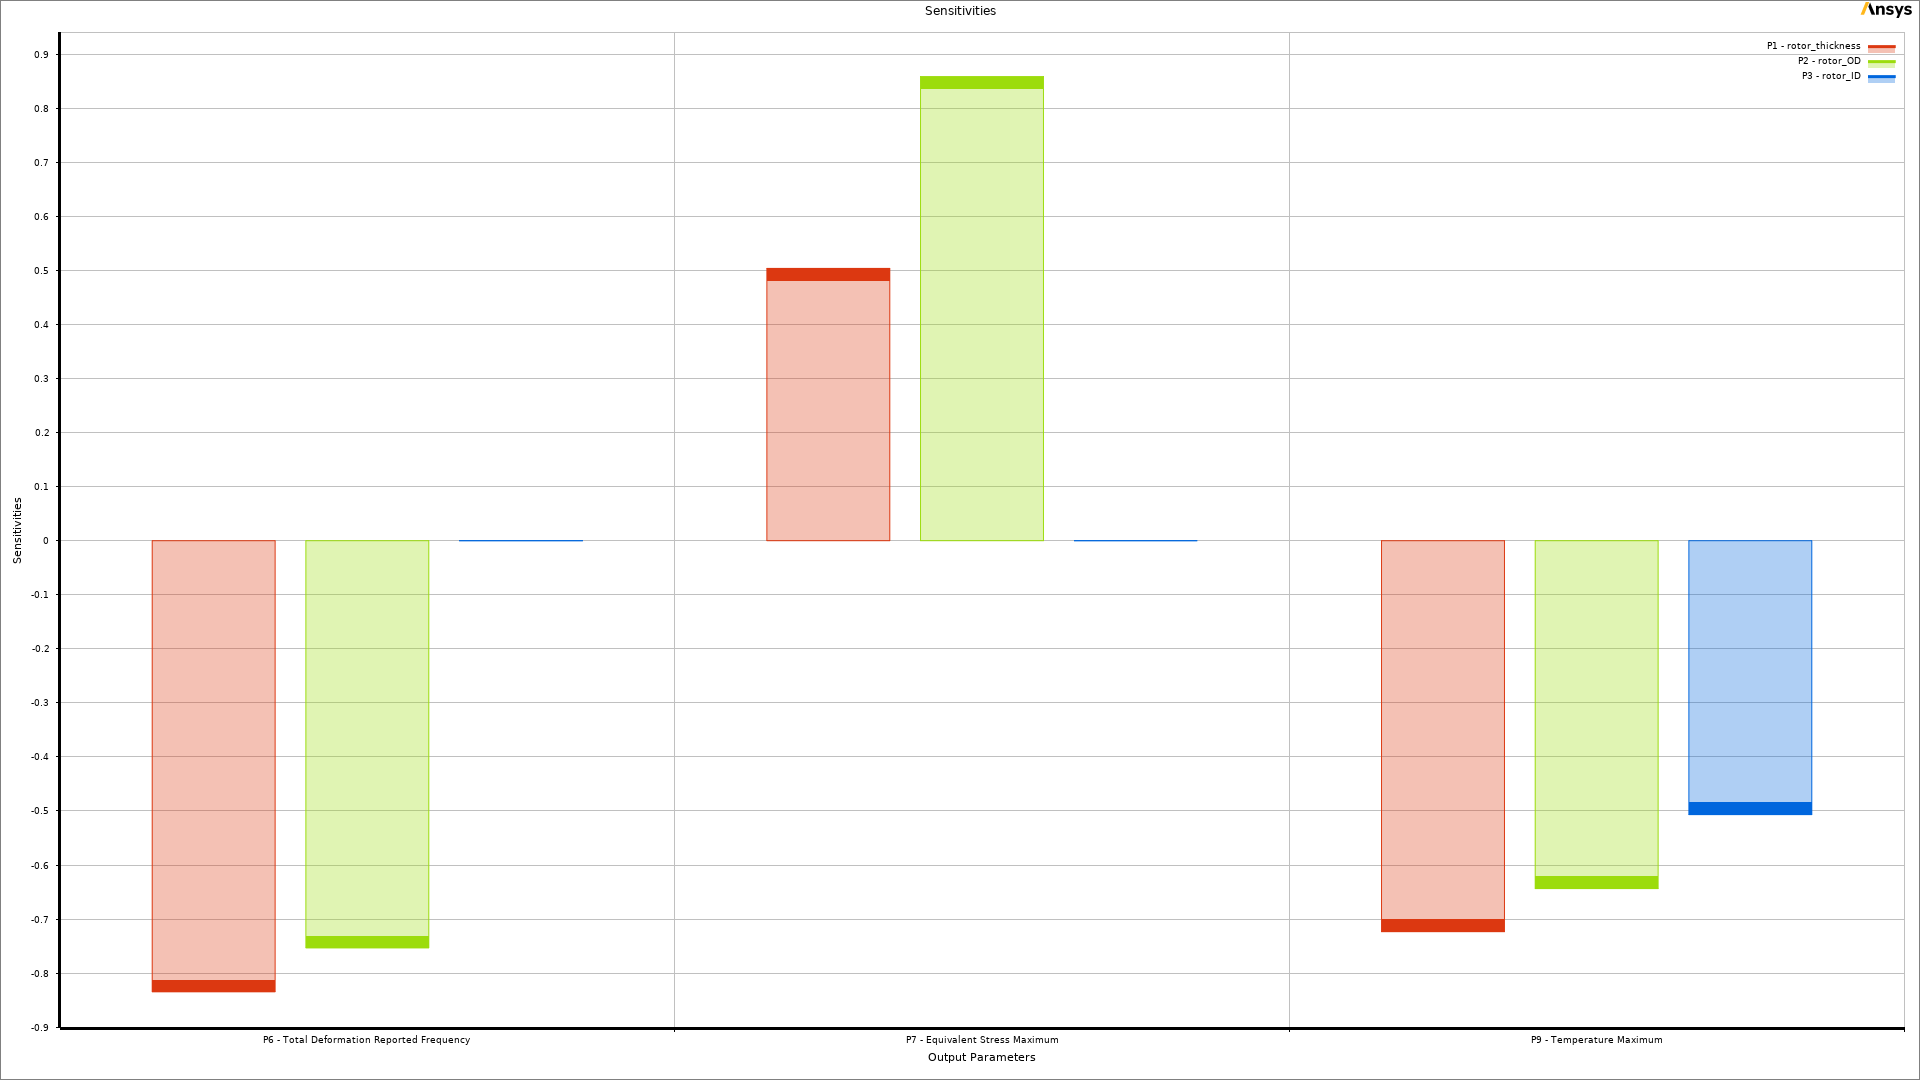
Sensitivity Chart

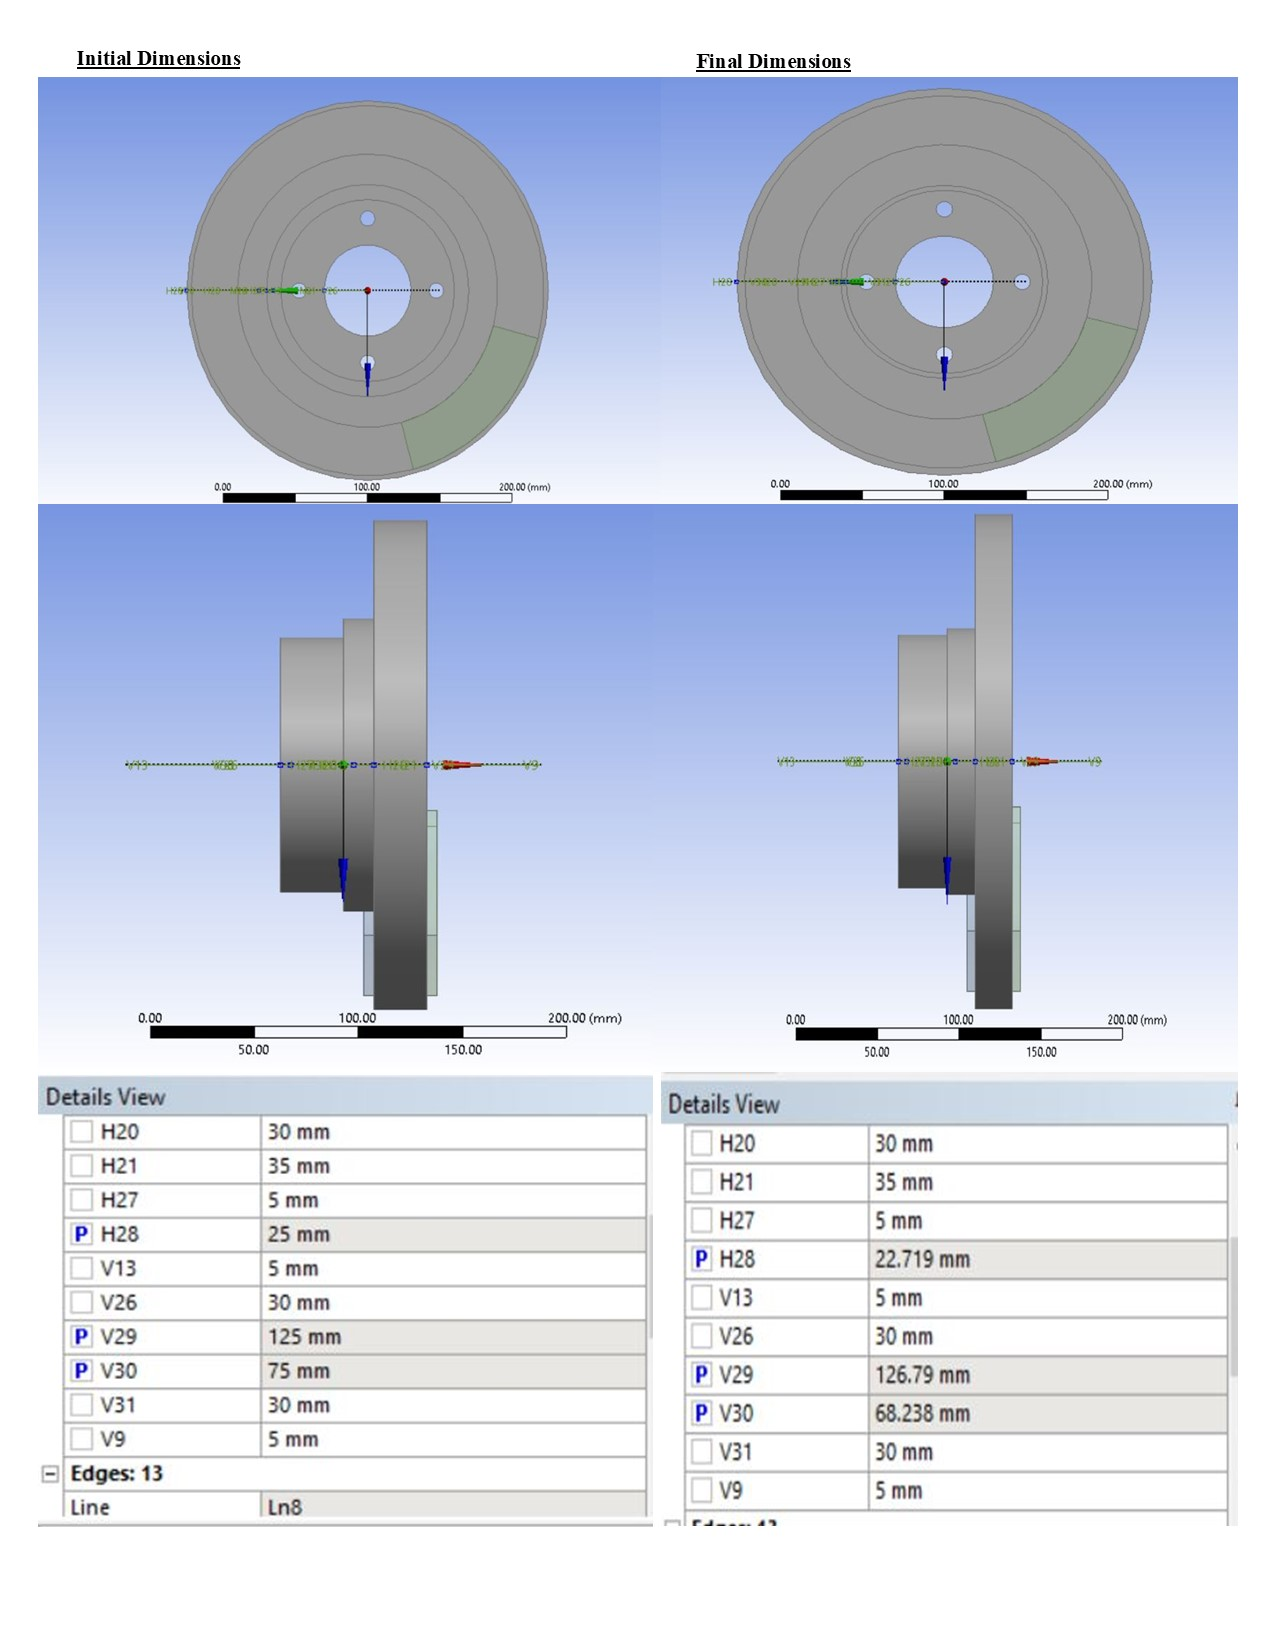
Comparison between initial and final dimension used.